# Midwest Jet Proposed Expansion Plan

### Importing Libraries

In [578]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read Data

In [579]:
df = pd.read_csv('Emily/Data/AviationData.csv', encoding = 'latin1')
df.head()
df['Air.carrier'].value_counts()

Air.carrier
Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: count, Length: 13590, dtype: int64

### Data Cleaning
1. Cleaning columns to uniform formatting
2. Make Location and Make uniform formatting
3. Converting Event Date to Date Time format, create year and month columns, include only last 20 years
4. Creating Make and Model column
5. Add Total Passengers column
6. Keep US only
7. Keep planes only
8. Keep Investigation Type Accident only
9. Remove Schedule column
10. Remove rows with Nan in Location
11. Remove rows with nan for Location, total fatal injuries, total minor, total uninjured
12. Make Airline names uniform
13. Split City and State from Location
14. Consolidate 'Fatel' in Injury Severity Column

In [580]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('.', ' ')
df.columns = df.columns.str.title()

In [581]:
df['Location'] = df['Location'].str.title()
df['Make'] = df['Make'].str.title()

In [582]:
df['Event Date'] = pd.to_datetime(df['Event Date'])
df['Month'] = df['Event Date'].dt.month
df['Year'] = df['Event Date'].dt.year
df = df[df['Year'] >= 2003].copy()


In [583]:
df['Make & Model'] = df['Make'] + " " + df['Model']

In [584]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']
df['Total Survivors'] = df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']

In [585]:
df = df[df['Country'] == 'United States']

In [586]:
df = df[df['Aircraft Category'] == 'Airplane']

In [587]:
df = df[df['Investigation Type'] == 'Accident']

In [588]:
df = df.drop('Schedule', axis=1)
df = df.drop(columns=['Far Description'])
df = df.drop(columns=['Latitude'])
df = df.drop(columns=['Longitude'])

In [589]:
df.dropna(subset = ['Location', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured'], inplace=True)

In [590]:
df['Air Carrier'] = df['Air Carrier'].replace("DELTA AIR LINES INC", "Delta Air Lines")
df['Air Carrier'] = df['Air Carrier'].replace("AMERICAN AIRLINES INC", "American Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("SOUTHWEST AIRLINES CO", "Southwest Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("UNITED AIR LINES INC", "United Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("United Airlines|", "United Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("CIVIL AIR PATROL", "CIVIL AIR PATROL INC")
df['Air Carrier'] = df['Air Carrier'].str.title()

In [591]:
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df['State'] = df['State'].str.upper()

In [592]:
df['Count'] = 1

In [593]:
df.head()


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal(1),Destroyed,...,Probable Cause,10-12-2014,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,"Teterboro, Nj",United States,KTEB,Teterboro NJ,Non-Fatal,Substantial,...,Probable Cause,04-02-2009,2,2005,Bombardier CL-600-1A11,13.0,13.0,Teterboro,NJ,1
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,Probable Cause,30-12-2008,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal(2),Destroyed,...,Probable Cause,28-12-2008,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal(1),Destroyed,...,Probable Cause,28-12-2008,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1


In [594]:

df['Injury Severity'] = df['Injury Severity'].replace('Fatal(1)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(2)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(3)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(5)', 'Fatal')
df['Injury Severity'].value_counts()

Injury Severity
Non-Fatal    14138
Fatal         3077
Minor          157
Serious        114
Name: count, dtype: int64

## Data Exploration

### Analysis by State

In [595]:
df_by_state = df.groupby(by = 'State').sum(numeric_only = True)
df_by_state.sort_values(by = 'Count', ascending = False).head()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count
State,,,,,,,,,,
CA,1708.0,556.0,552.0,309.0,5293.0,10243,3235030,6710.0,6154.0,1606
TX,1483.0,393.0,388.0,314.0,4474.0,9051,2792698,5569.0,5176.0,1386
FL,1465.0,406.0,349.0,248.0,5315.0,8332,2602983,6318.0,5912.0,1292
AK,1318.0,252.0,317.0,186.0,2601.0,8608,2548554,3356.0,3104.0,1265
AZ,697.0,183.0,115.0,94.0,1502.0,4163,1309345,1894.0,1711.0,650


In [596]:

df_by_state['Percent Fatal Injuries'] = (df_by_state['Total Fatal Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Serious Injuries'] = (df_by_state['Total Serious Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Minor Injuries'] = (df_by_state['Total Minor Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Uninjured'] = (df_by_state['Total Uninjured'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Survivors'] = (df_by_state['Total Survivors'] / df_by_state['Total Passengers'])*100
df_by_state.head()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
State,,,,,,,,,,,,,,,
,54.0,26.0,13.0,17.0,633.0,316,78532,689.0,663.0,39,3.773585,1.886792,2.467344,91.872279,96.226415
AK,1318.0,252.0,317.0,186.0,2601.0,8608,2548554,3356.0,3104.0,1265,7.508939,9.445769,5.542312,77.502980,92.491061
AL,241.0,91.0,52.0,30.0,221.0,1395,451327,394.0,303.0,224,23.096447,13.197970,7.614213,56.091371,76.903553
AO,14.0,15.0,2.0,2.0,274.0,69,26207,293.0,278.0,13,5.119454,0.682594,0.682594,93.515358,94.880546
AR,281.0,81.0,69.0,42.0,238.0,1796,562038,430.0,349.0,279,18.837209,16.046512,9.767442,55.348837,81.162791


In [597]:
df_by_state.sort_values(by='Percent Survivors', ascending=False, inplace=True)

In [598]:
df_by_state = df_by_state[df_by_state['Count'] > 1].copy()
df_by_state.reset_index(inplace=True)
df_by_state = df_by_state[df_by_state['State'].str.strip() != 'PO'].copy()
df_by_state.set_index('State', inplace=True)
df_by_state.reset_index(inplace=True)
df_by_state.drop(8, inplace=True)
df_by_state.set_index('State', inplace=True)
df_by_state.head()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
State,,,,,,,,,,,,,,,
MD,206.0,27.0,52.0,23.0,1027.0,1313,390825,1129.0,1102.0,194,2.391497,4.605846,2.037201,90.965456,97.608503
VT,41.0,5.0,7.0,7.0,165.0,290,80600,184.0,179.0,40,2.717391,3.804348,3.804348,89.673913,97.282609
NH,63.0,10.0,9.0,17.0,308.0,443,122907,344.0,334.0,61,2.906977,2.616279,4.941860,89.534884,97.093023
NJ,249.0,53.0,49.0,63.0,1384.0,1425,435056,1549.0,1496.0,216,3.421562,3.163331,4.067140,89.347966,96.578438
IL,411.0,93.0,95.0,58.0,2462.0,2504,735118,2708.0,2615.0,365,3.434269,3.508124,2.141802,90.915805,96.565731


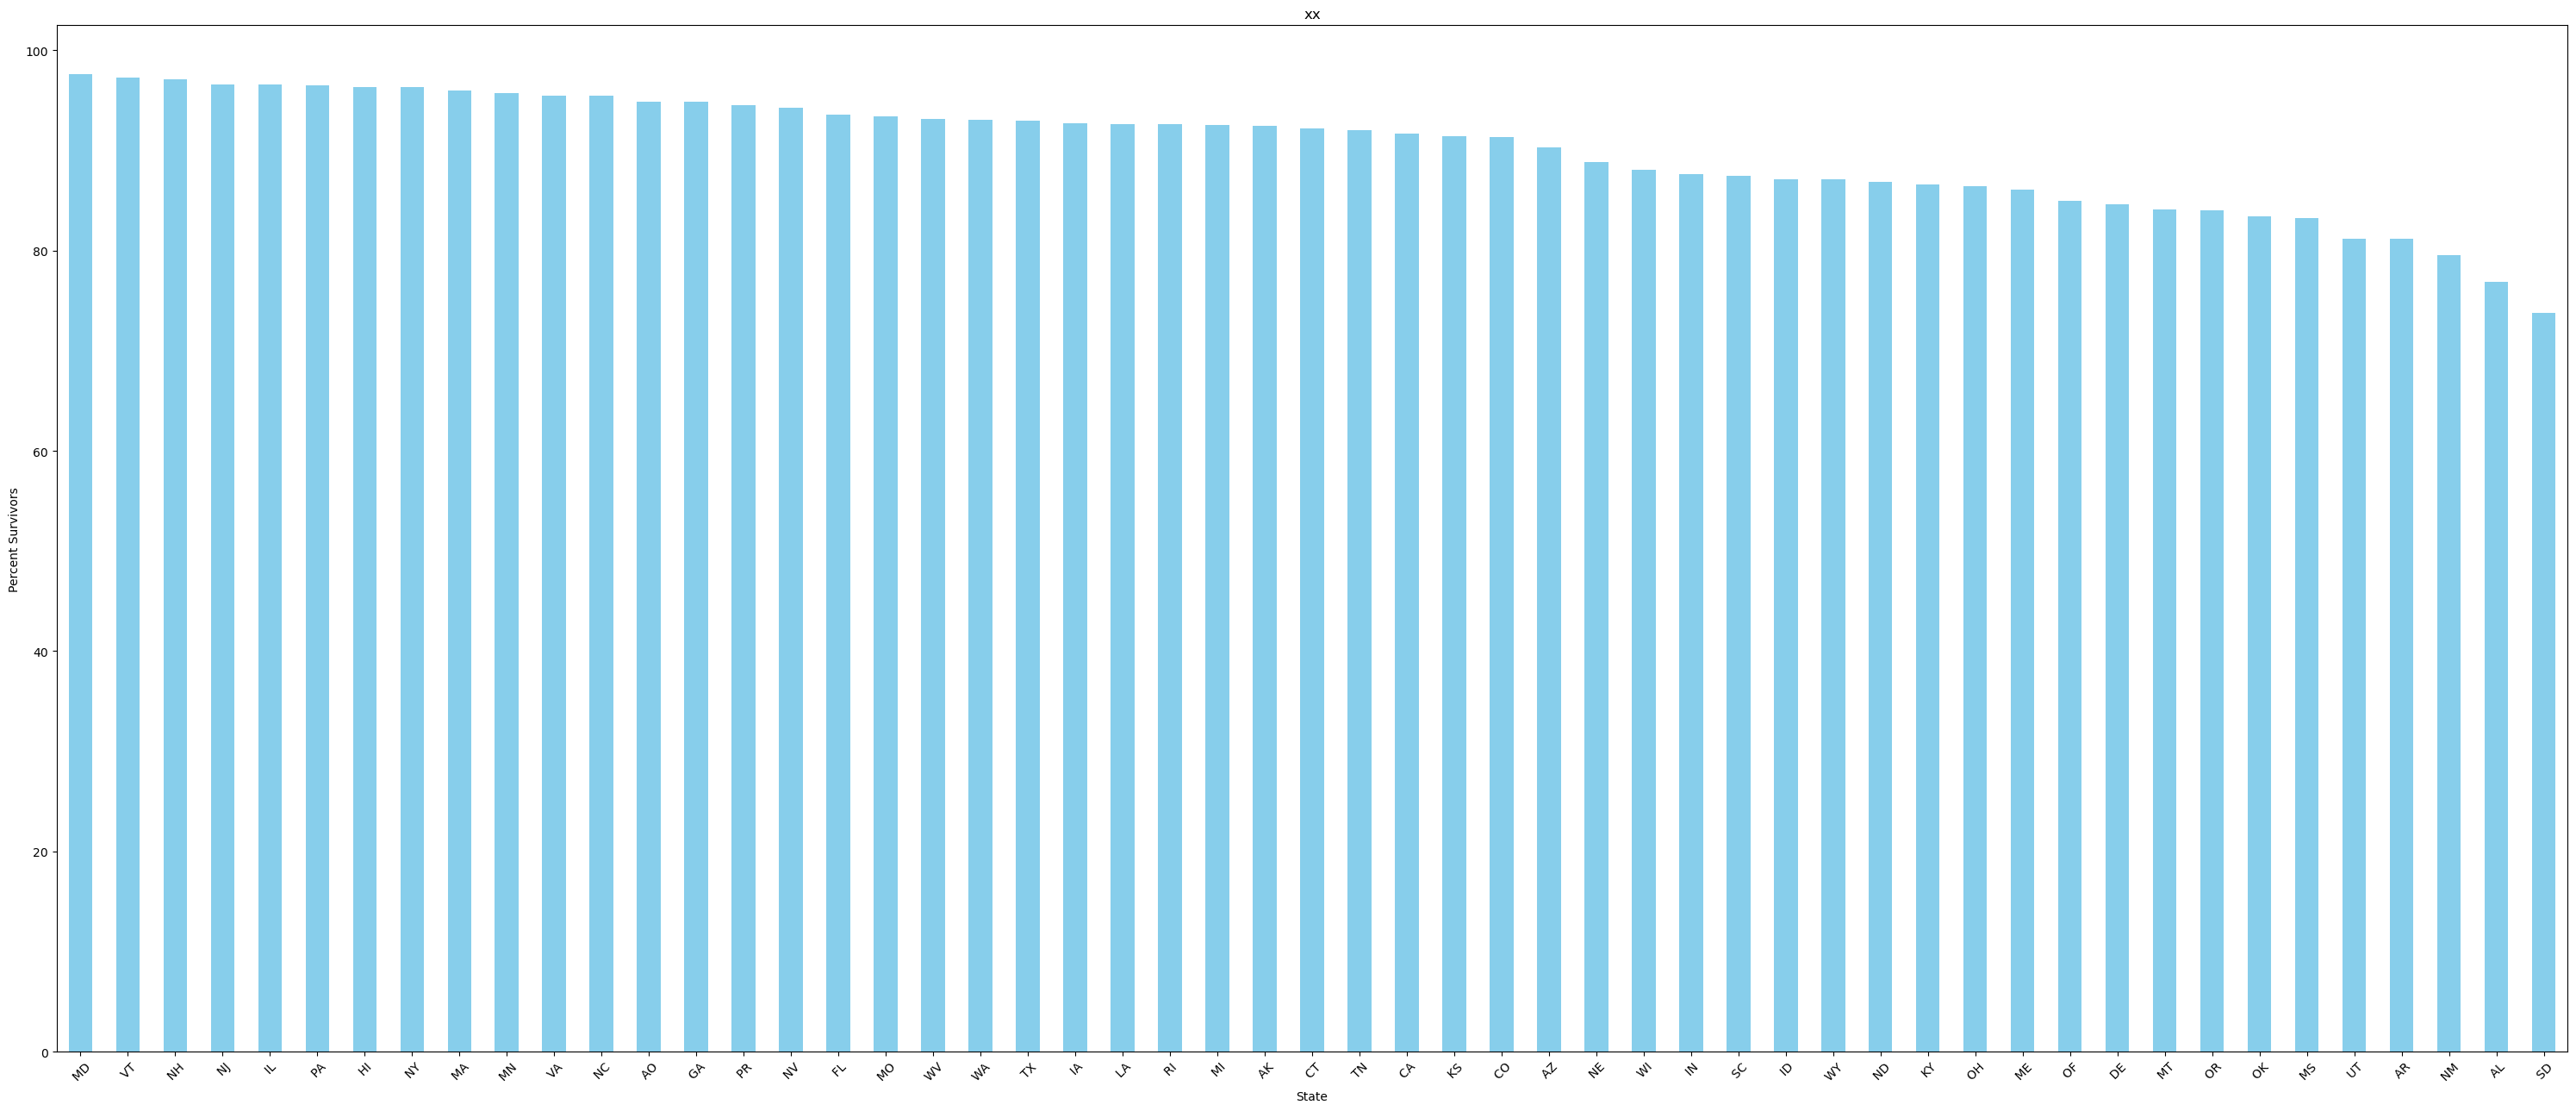

In [599]:

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
df_by_state['Percent Survivors'].plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Percent Survivors')
plt.title('xx')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

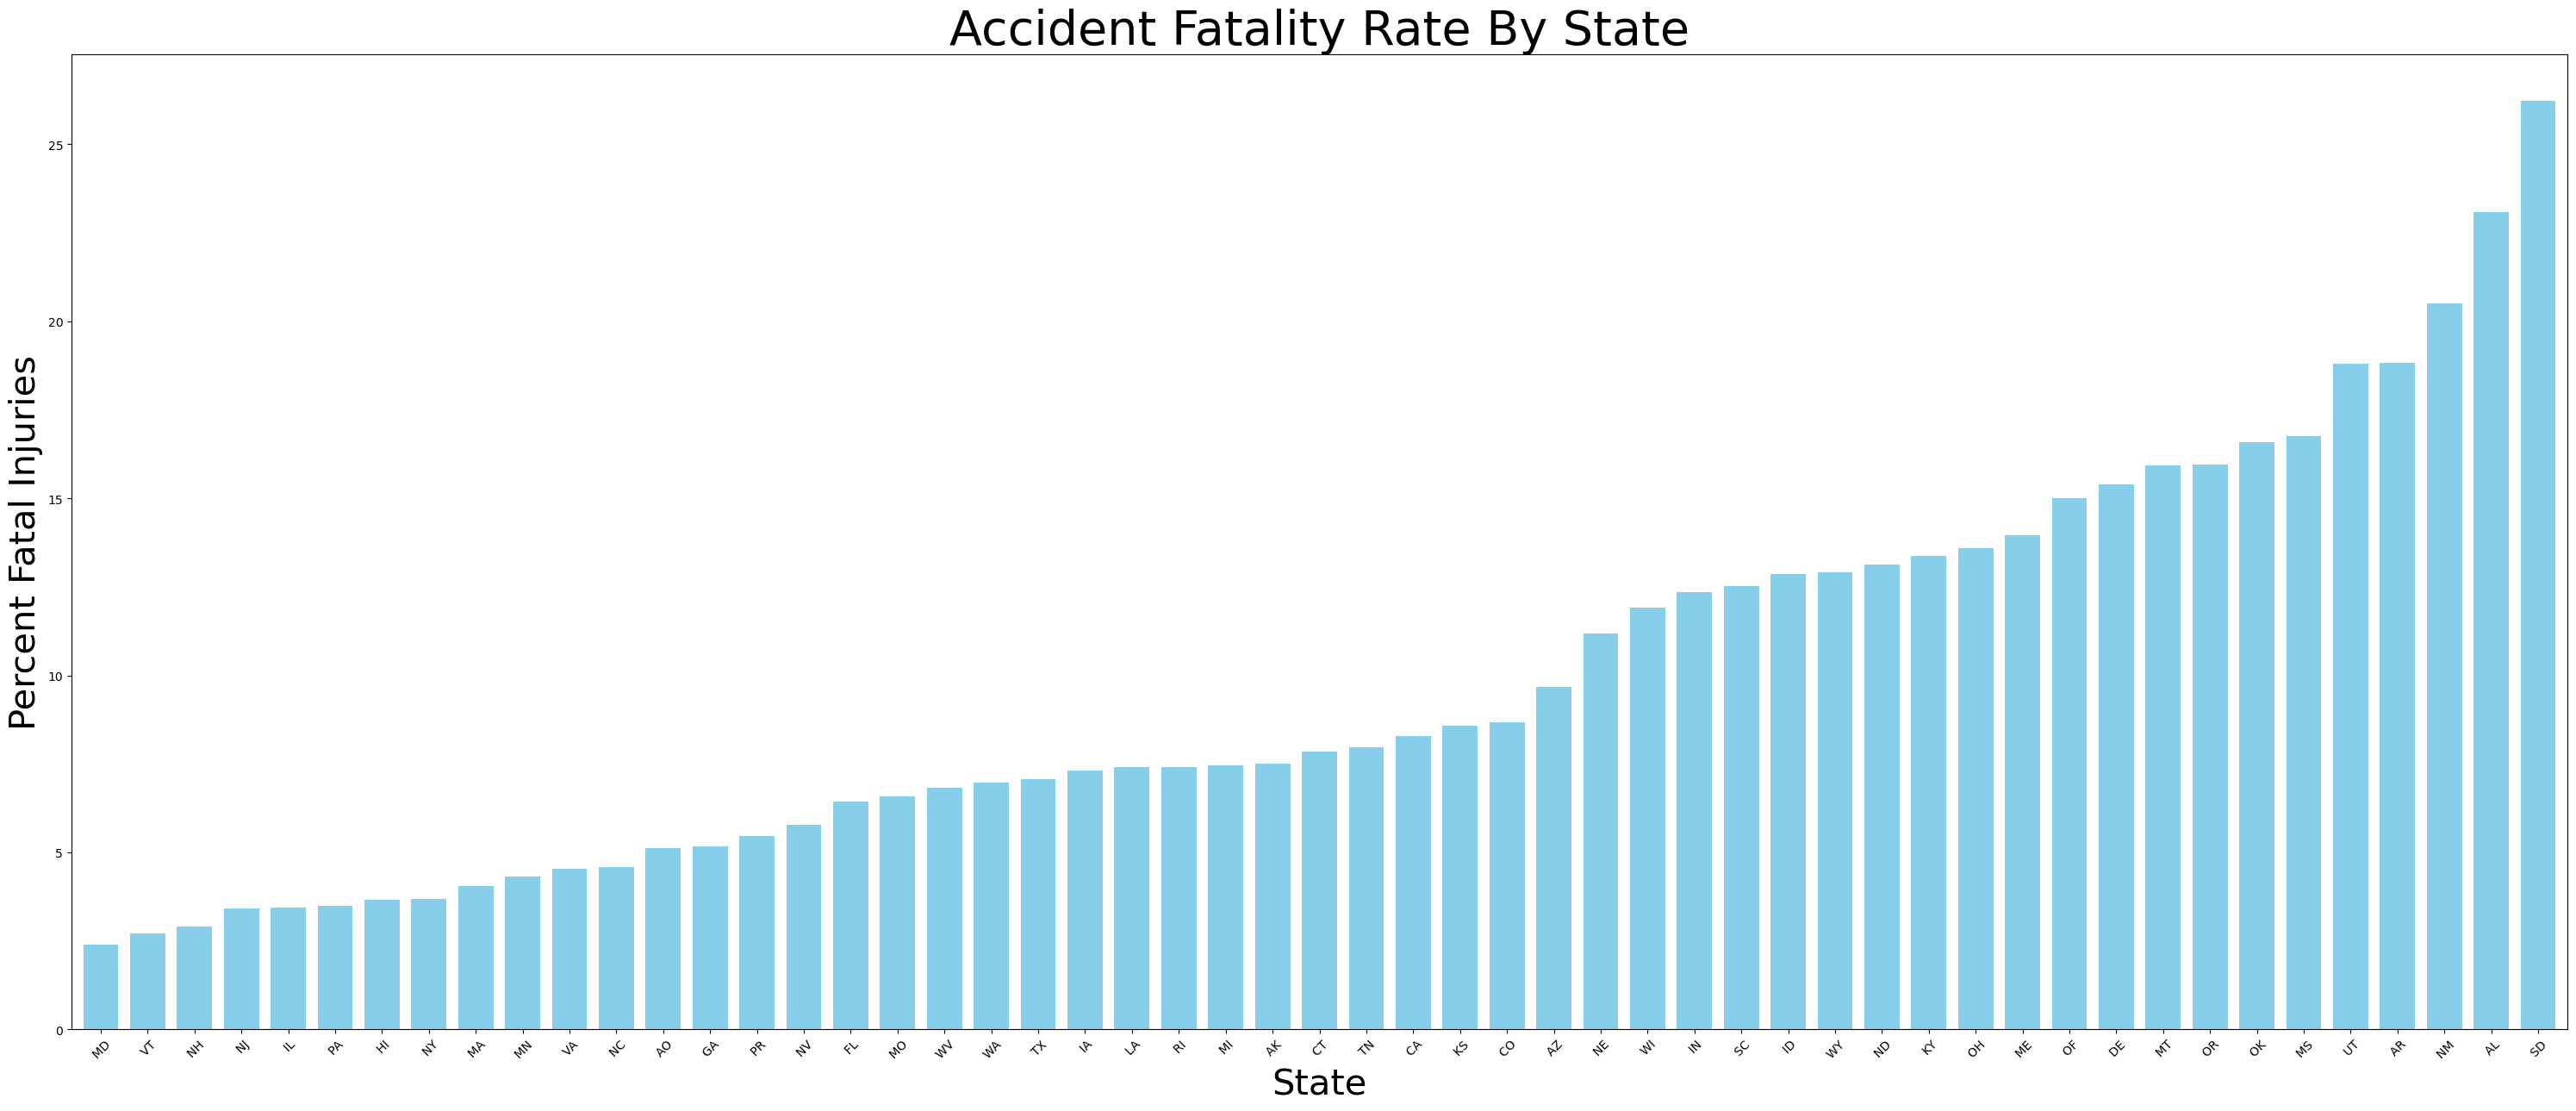

In [600]:
plt.figure(figsize=(30,13))
df_by_state['Percent Fatal Injuries'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('State', fontsize=30)
plt.ylabel('Percent Fatal Injuries', fontsize=30)
plt.title('Accident Fatality Rate By State', fontsize=40)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

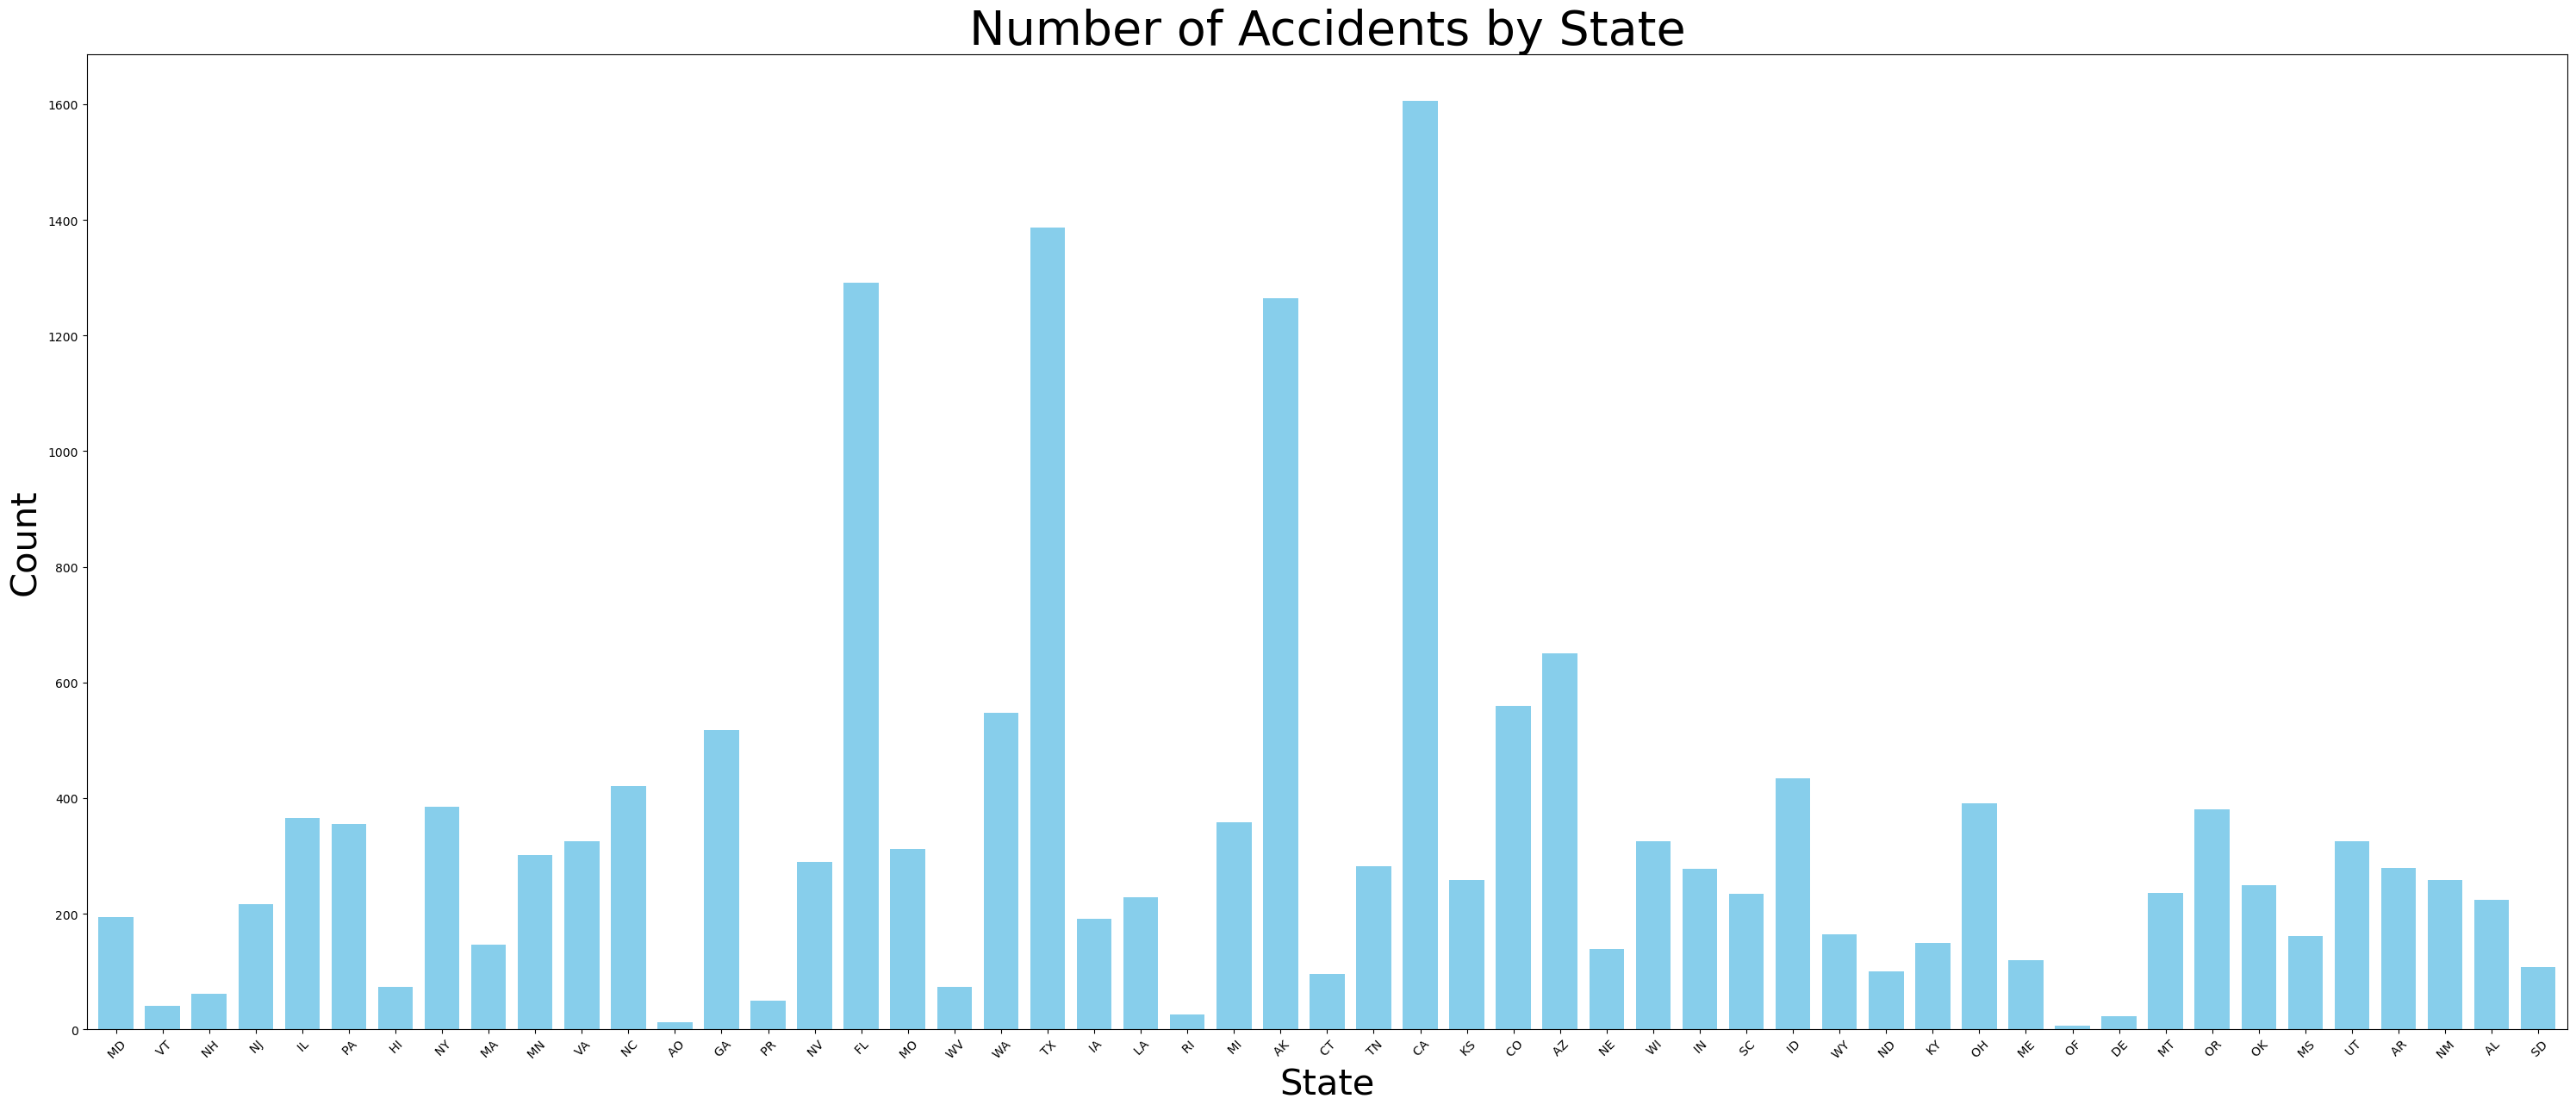

In [601]:

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
df_by_state['Count'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('State', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title('Number of Accidents by State', fontsize=40)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

### Make & Model Analysis

In [602]:
df_make = df.groupby(by='Make').sum(numeric_only=True)
df_make.sort_values(by='Count', inplace=True, ascending=False)
df_make

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count
Make,,,,,,,,,,
Cessna,5492.0,1260.0,1368.0,668.0,6506.0,33922,10409155,9802.0,8542.0,5167
Piper,3348.0,953.0,728.0,495.0,3483.0,20392,6150562,5659.0,4706.0,3053
Beech,1379.0,582.0,278.0,207.0,1328.0,7224,2195946,2395.0,1813.0,1090
Mooney,273.0,136.0,71.0,69.0,218.0,1829,556032,494.0,358.0,276
Boeing,433.0,27.0,503.0,176.0,22515.0,1847,533897,23221.0,23194.0,265
...,...,...,...,...,...,...,...,...,...,...
Grumman American Aviation Corp,1.0,1.0,0.0,2.0,0.0,10,2010,3.0,2.0,1
Grumman American Avn. Corp,1.0,1.0,0.0,0.0,0.0,5,2022,1.0,0.0,1
Guarino,1.0,0.0,2.0,0.0,0.0,2,2017,2.0,2.0,1


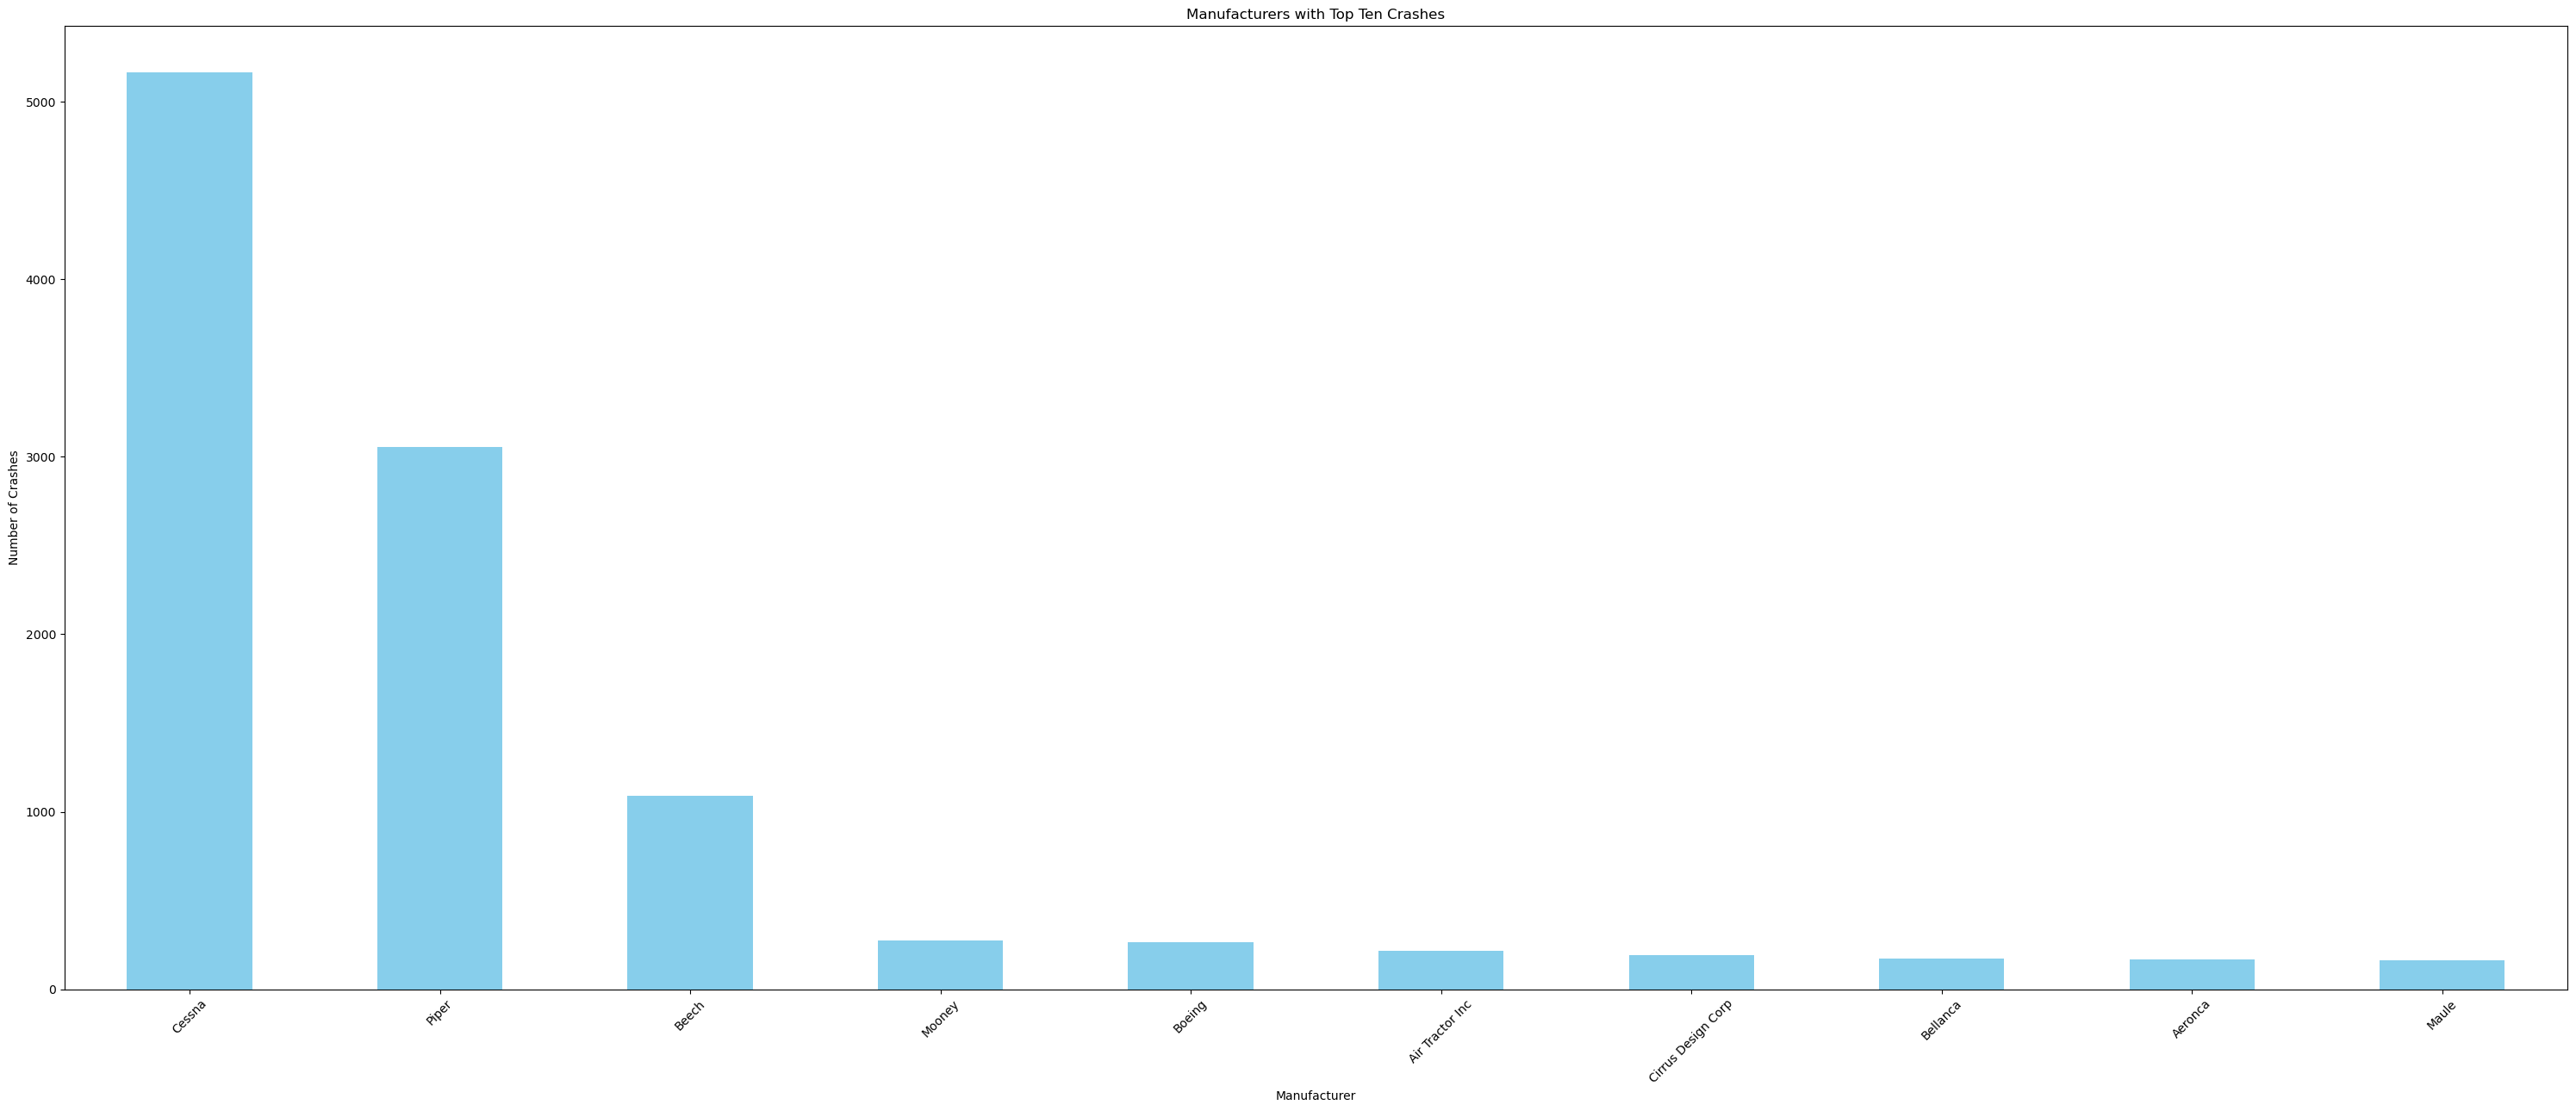

In [603]:
df_top_10 = df_make.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
df_top_10['Count'].plot(kind='bar', color='skyblue')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Crashes')
plt.title('Manufacturers with Top Ten Crashes')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [604]:
favorable_outcome_df = df[(df['Total Uninjured'] > 10) & (df['Injury Severity'] == 'Non-Fatal')]
unfavorable_outcome_df = df[(df['Aircraft Damage'] == 'Destroyed') & (df['Injury Severity'] == 'Fatal')]
unfavorable_outcome_df.head(10)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,10-12-2014,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1
62114,20070510X00546,Accident,DFW07LA160,2007-02-28,"Carlsbad, Nm",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,25-11-2008,2,2007,Ingraham RV-6,1.0,0.0,Carlsbad,NM,1
62139,20070316X00301,Accident,LAX07FA103,2007-03-07,"Tooele, Ut",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,29-01-2009,3,2007,Piper PA-28-235,3.0,0.0,Tooele,UT,1
62458,20070508X00524,Accident,LAX07FA150,2007-05-03,"Dillon, Mt",United States,DLN,Dillon,Fatal,Destroyed,...,Probable Cause,25-11-2008,5,2007,Cessna S550,2.0,0.0,Dillon,MT,1
63245,20080204X00135,Accident,NYC07FAMS1,2007-08-25,"Westhampton, Ny",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,8,2007,Piper PA-32-260,1.0,0.0,Westhampton,NY,1
63290,20070907X01326,Accident,MIA07FA137,2007-09-01,"Elizabethton, Tn",United States,0A9,Elizabethton Municipal Airport,Fatal,Destroyed,...,Probable Cause,25-11-2008,9,2007,Beech A36,5.0,0.0,Elizabethton,TN,1
63303,20070925X01442,Accident,NYC07LA210,2007-09-02,"Hazleton, Pa",United States,KHZL,Hazleton Minicipal,Fatal,Destroyed,...,Probable Cause,28-12-2008,9,2007,Cessna 150J,1.0,0.0,Hazleton,PA,1
63329,20070917X01406,Accident,NYC07FA217,2007-09-06,"Syria, Va",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,05-12-2008,9,2007,Piper PA-28-140,3.0,0.0,Syria,VA,1


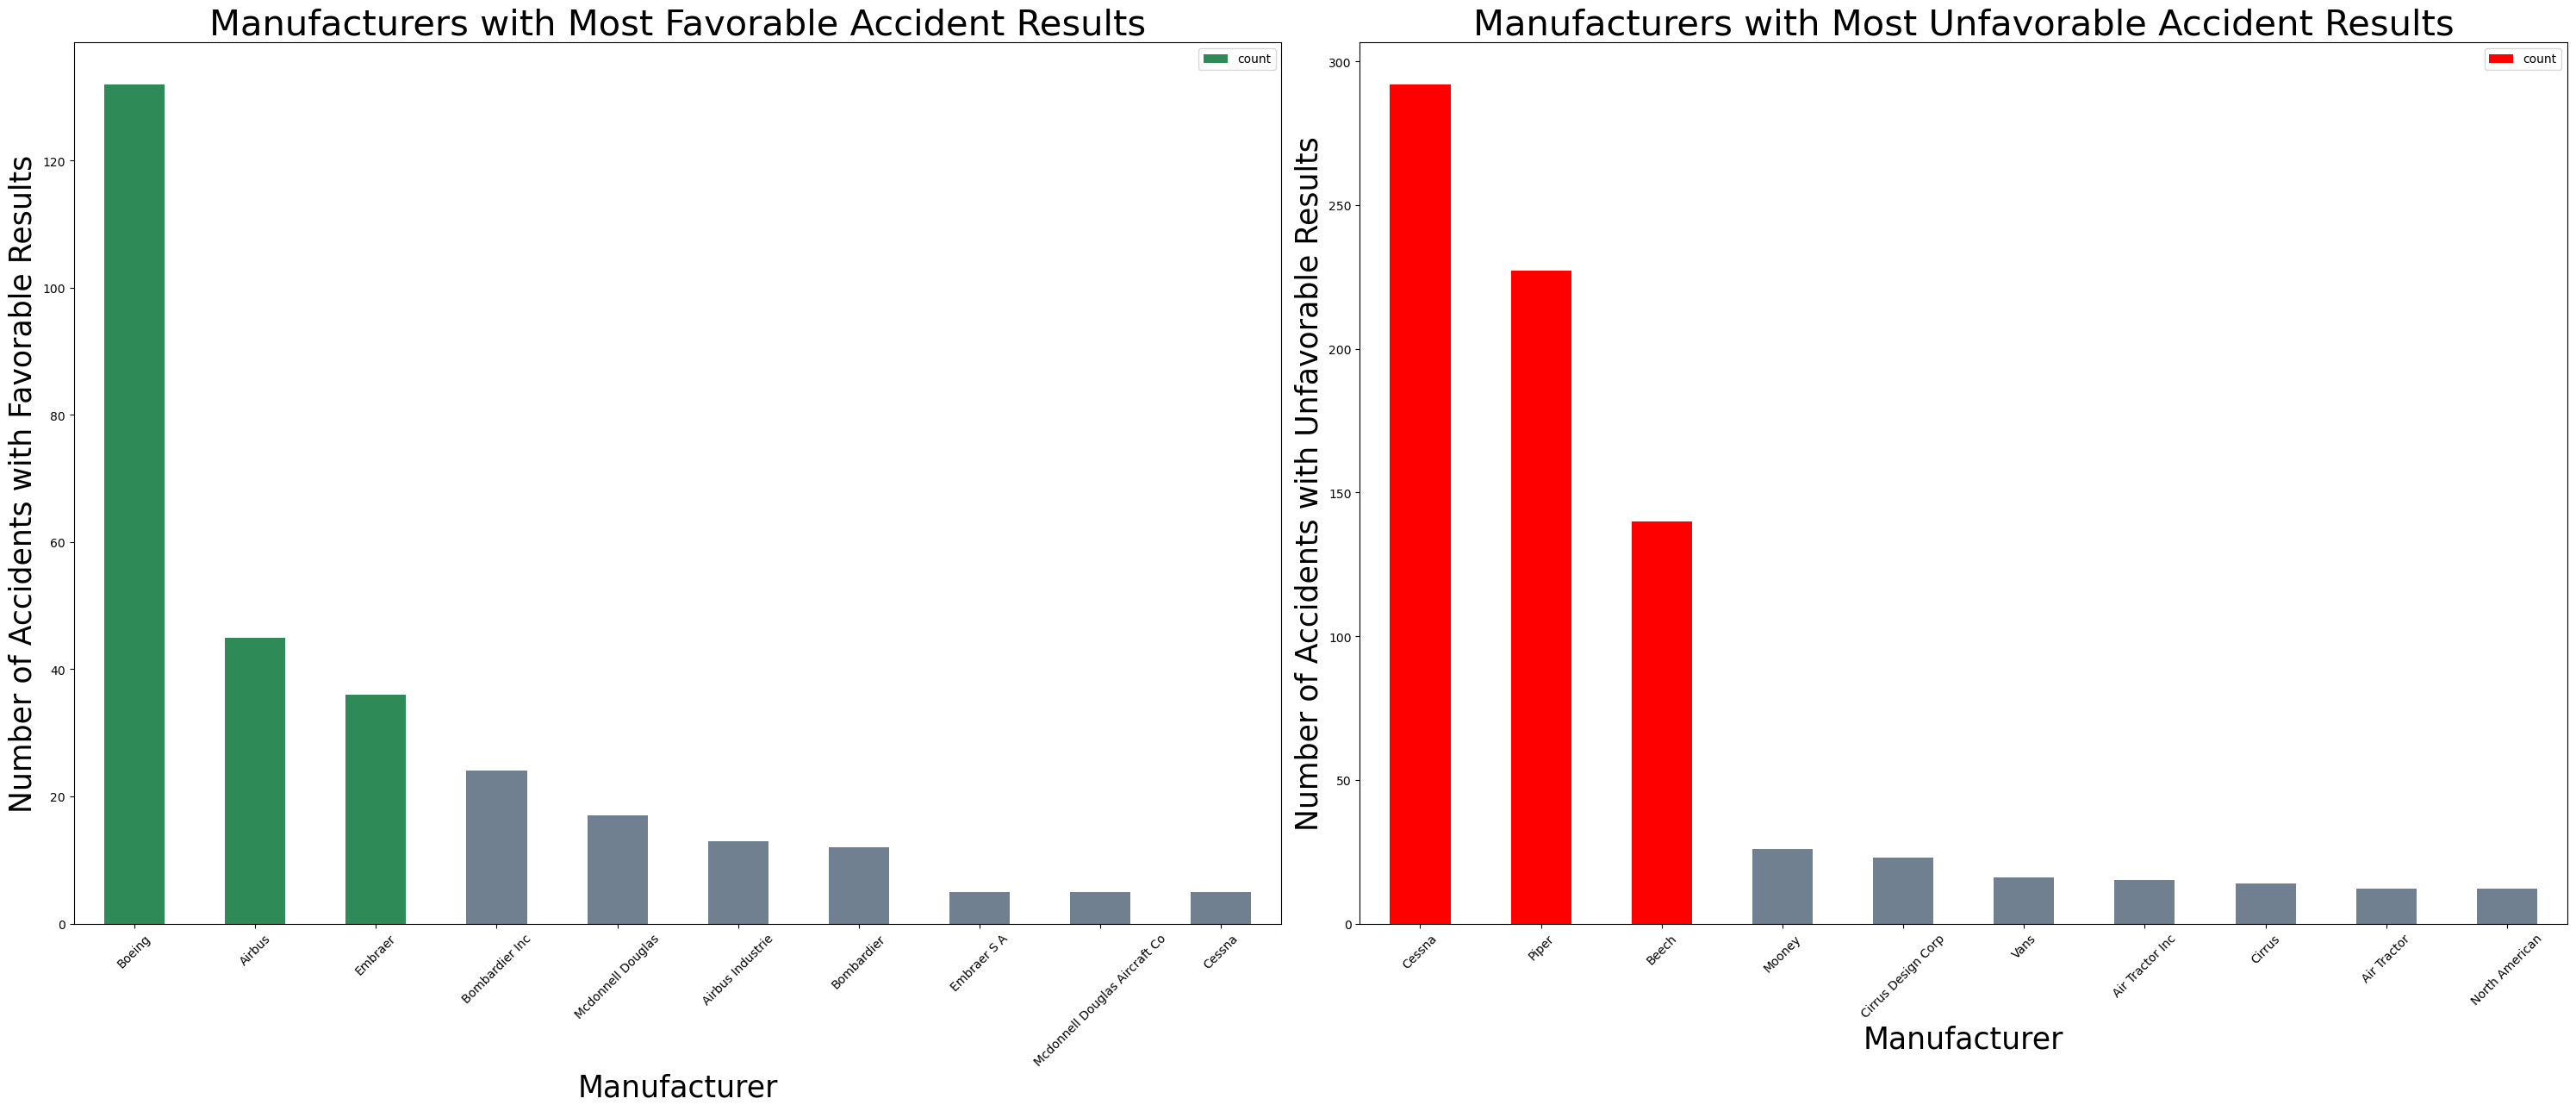

In [605]:
#Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(30, 13))

good_countss = favorable_outcome_df['Make'].value_counts()

#Select the top 10 most frequent values
top_10_make_counts_good = good_countss.head(10)
#Plot the first graph (fatal results)
top_10_make_counts_good.plot(kind='bar', color=['#2E8B57','#2E8B57', '#2E8B57', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[0])
axes[0].set_xlabel('Manufacturer', fontsize=25)
axes[0].set_ylabel('Number of Accidents with Favorable Results', fontsize=25)
axes[0].set_title('Manufacturers with Most Favorable Accident Results',fontsize=30)
axes[0].set_xticklabels(top_10_make_counts_good.index, rotation=45)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].legend()


bad_countss = unfavorable_outcome_df['Make'].value_counts()

#Select the top 10 most frequent values
top_10_make_counts_bad = bad_countss.head(10)

#Plot the second graph (good conditions)
top_10_make_counts_bad.plot(kind='bar', color=['red', 'red', 'red', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[1])
axes[1].set_xlabel('Manufacturer', fontsize=25)
axes[1].set_ylabel('Number of Accidents with Unfavorable Results', fontsize=25)
axes[1].set_title('Manufacturers with Most Unfavorable Accident Results', fontsize=30)
axes[1].set_xticklabels(top_10_make_counts_bad.index, rotation=45)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].legend()

#Adjust layout and show plots
plt.tight_layout()
plt.show()

## Additional Boeing Analysis

In [606]:
boeing_df = df[df['Make'] == 'Boeing'].copy()
boeing_df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,Probable Cause,30-12-2008,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1
63845,20071231X02013,Accident,CHI08FA050,2007-12-14,"Chicago, Il",United States,ORD,Chicago O'Hare Intl,Non-Fatal,Minor,...,Probable Cause,24-12-2008,12,2007,Boeing 777-222,264.0,264.0,Chicago,IL,1
64112,20080413X00464,Accident,NYC08CA115,2008-02-23,"Valdosta, Ga",United States,MCO,Orlando International,Non-Fatal,NaN,...,"An unexpected encounter with turbulence, while...",25-09-2020,2,2008,Boeing 737-700,103.0,103.0,Valdosta,GA,1
64303,20080722X01094,Accident,NYC08CA156,2008-04-07,"Miami, Fl",United States,MIA,Miami International Airport,Non-Fatal,NaN,...,"An unexpected encounter with turbulence, durin...",25-09-2020,4,2008,Boeing 737-823,148.0,148.0,Miami,FL,1
64341,20080417X00501,Accident,CHI08LA102,2008-04-14,"Youngstown, Oh",United States,4G4,Youngstown Elser Airport,Non-Fatal,Substantial,...,The pilot's failure to maintain adequate airsp...,25-09-2020,4,2008,Boeing E75N1,2.0,2.0,Youngstown,OH,1


In [607]:
boeing_df_model = boeing_df.groupby(by='Make & Model').sum(numeric_only=True)
boeing_df_model = boeing_df_model[boeing_df_model['Total Passengers'] >= 30].copy()
boeing_df_model.sort_values(by='Count', ascending=False)

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count
Make & Model,,,,,,,,,,
Boeing A75N1(PT17),27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28
Boeing 737,46.0,0.0,14.0,10.0,2987.0,162,52429,3011.0,3011.0,26
Boeing 737 7H4,28.0,1.0,133.0,15.0,1506.0,111,28207,1655.0,1654.0,14
Boeing 767,20.0,3.0,51.0,8.0,1728.0,75,24169,1790.0,1787.0,12
Boeing 757,22.0,0.0,1.0,3.0,1613.0,86,24207,1617.0,1617.0,12
Boeing 737-8H4,12.0,0.0,1.0,5.0,771.0,51,14128,777.0,777.0,7
Boeing 777,4.0,0.0,1.0,4.0,742.0,45,12111,747.0,747.0,6
Boeing 737-7H4,12.0,0.0,5.0,5.0,684.0,38,12075,694.0,694.0,6
Boeing 737-700,8.0,0.0,1.0,2.0,413.0,22,8068,416.0,416.0,4


In [617]:
boeing_df_model['Percent Fatal Injuries'] = (boeing_df_model['Total Fatal Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Serious Injuries'] = (boeing_df_model['Total Serious Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Minor Injuries'] = (boeing_df_model['Total Minor Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Uninjured'] = (boeing_df_model['Total Uninjured'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Survivors'] = (boeing_df_model['Total Survivors'] / boeing_df_model['Total Passengers'])*100
boeing_df_model.sort_values(by='Total Passengers', ascending=False, inplace=True)

In [618]:
boeing_df_model.sort_values(by='Percent Uninjured', ascending=False, inplace=True)

In [619]:
boeing_df_model.reset_index(inplace=True)

In [620]:
boeing_df_model['Consolidated'] = [str(x[:10]) for x in boeing_df_model['Make & Model']]
boeing_df_model

,index,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated,Percent Survivors
0,0,Boeing DHC-8-102,2.0,0.0,0.0,0.0,36.0,1,2012,36.0,36.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing DHC,100.000000
1,1,Boeing 757-224,2.0,0.0,0.0,0.0,172.0,9,2021,172.0,172.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
2,2,Boeing 757-351,2.0,0.0,0.0,0.0,352.0,12,2008,352.0,352.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
3,3,Boeing 757-223,2.0,0.0,0.0,0.0,160.0,10,2010,160.0,160.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
4,4,Boeing 737-732,4.0,0.0,0.0,0.0,577.0,17,4022,577.0,577.0,2,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737,100.000000
5,5,Boeing 767-375,2.0,0.0,0.0,0.0,140.0,9,2017,140.0,140.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 767,100.000000
6,6,Boeing 737 76Q,2.0,0.0,0.0,0.0,121.0,4,2016,121.0,121.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737,100.000000
7,7,Boeing 777-300,2.0,0.0,0.0,0.0,311.0,8,2008,311.0,311.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 777,100.000000
8,8,Boeing 757-222,6.0,0.0,0.0,1.0,531.0,23,6033,532.0,532.0,3,0.000000,0.000000,0.187970,99.812030,100.000000,Boeing 757,100.000000
9,9,Boeing 737 3H4,6.0,0.0,0.0,1.0,419.0,30,6046,420.0,420.0,3,0.000000,0.000000,0.238095,99.761905,100.000000,Boeing 737,100.000000


In [621]:
boeing_df_model['Consolidated'].value_counts()

Consolidated
Boeing 737    24
Boeing 757    10
Boeing 777     9
Boeing 767     7
Boeing 747     2
Boeing 717     2
Boeing DHC     1
Boeing 787     1
Boeing DC-     1
Boeing A75     1
Name: count, dtype: int64

In [622]:
boeing_df_model['Consolidated'].replace('Boeing DC-', 'Boeing DC-10', inplace=True)
boeing_df_model['Consolidated'].replace('Boeing DHC', 'Boeing DHC-8-102', inplace=True)
boeing_df_model

,index,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated,Percent Survivors
0,0,Boeing DHC-8-102,2.0,0.0,0.0,0.0,36.0,1,2012,36.0,36.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing DHC-8-102,100.000000
1,1,Boeing 757-224,2.0,0.0,0.0,0.0,172.0,9,2021,172.0,172.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
2,2,Boeing 757-351,2.0,0.0,0.0,0.0,352.0,12,2008,352.0,352.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
3,3,Boeing 757-223,2.0,0.0,0.0,0.0,160.0,10,2010,160.0,160.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757,100.000000
4,4,Boeing 737-732,4.0,0.0,0.0,0.0,577.0,17,4022,577.0,577.0,2,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737,100.000000
5,5,Boeing 767-375,2.0,0.0,0.0,0.0,140.0,9,2017,140.0,140.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 767,100.000000
6,6,Boeing 737 76Q,2.0,0.0,0.0,0.0,121.0,4,2016,121.0,121.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737,100.000000
7,7,Boeing 777-300,2.0,0.0,0.0,0.0,311.0,8,2008,311.0,311.0,1,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 777,100.000000
8,8,Boeing 757-222,6.0,0.0,0.0,1.0,531.0,23,6033,532.0,532.0,3,0.000000,0.000000,0.187970,99.812030,100.000000,Boeing 757,100.000000
9,9,Boeing 737 3H4,6.0,0.0,0.0,1.0,419.0,30,6046,420.0,420.0,3,0.000000,0.000000,0.238095,99.761905,100.000000,Boeing 737,100.000000


In [623]:
boeing_families_df = boeing_df_model.groupby(by='Consolidated').sum(numeric_only=True)
columns_to_drop = ['Percent Fatal Injuries', 'Percent Serious Injuries', 'Percent Minor Injuries', 'Percent Uninjured', 'Percent Survivors']
boeing_families_df = boeing_families_df.drop(columns=columns_to_drop)
boeing_families_df

,index,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Survivors
Consolidated,,,,,,,,,,,,
Boeing 717,71,10.0,0.0,1.0,4.0,523.0,47,10068,528.0,528.0,5,200.000000
Boeing 737,722,168.0,1.0,218.0,63.0,10856.0,612,177359,11138.0,11137.0,88,2399.939577
Boeing 747,77,16.0,0.0,25.0,3.0,601.0,20,8037,629.0,629.0,4,200.000000
Boeing 757,154,48.0,0.0,3.0,9.0,4011.0,175,50369,4023.0,4023.0,25,1000.000000
Boeing 767,225,32.0,3.0,62.0,13.0,2853.0,120,36251,2931.0,2928.0,18,699.832402
Boeing 777,280,22.0,3.0,150.0,61.0,2855.0,108,30226,3069.0,3066.0,15,899.022801
Boeing 787,17,2.0,0.0,0.0,2.0,440.0,13,4034,442.0,442.0,2,100.000000
Boeing A75,55,27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28,96.078431
Boeing DC-10,52,3.0,0.0,11.0,1.0,168.0,5,2009,180.0,180.0,1,100.000000


In [624]:
boeing_families_df['Percent Fatal Injuries'] = (boeing_families_df['Total Fatal Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Serious Injuries'] = (boeing_families_df['Total Serious Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Minor Injuries'] = (boeing_families_df['Total Minor Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Uninjured'] = (boeing_families_df['Total Uninjured'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Survivors'] = (boeing_families_df['Total Survivors'] / boeing_families_df['Total Passengers'])*100
boeing_families_df.sort_values(by='Total Passengers', ascending=False, inplace=True)
boeing_families_df

,index,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Survivors,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
Consolidated,,,,,,,,,,,,,,,,,
Boeing 737,722,168.0,1.0,218.0,63.0,10856.0,612,177359,11138.0,11137.0,88,2399.939577,0.008978,1.957263,0.565631,97.468127,99.991022
Boeing 757,154,48.0,0.0,3.0,9.0,4011.0,175,50369,4023.0,4023.0,25,1000.000000,0.000000,0.074571,0.223714,99.701715,100.000000
Boeing 777,280,22.0,3.0,150.0,61.0,2855.0,108,30226,3069.0,3066.0,15,899.022801,0.097752,4.887586,1.987618,93.027045,99.902248
Boeing 767,225,32.0,3.0,62.0,13.0,2853.0,120,36251,2931.0,2928.0,18,699.832402,0.102354,2.115319,0.443535,97.338792,99.897646
Boeing 747,77,16.0,0.0,25.0,3.0,601.0,20,8037,629.0,629.0,4,200.000000,0.000000,3.974563,0.476948,95.548490,100.000000
Boeing 717,71,10.0,0.0,1.0,4.0,523.0,47,10068,528.0,528.0,5,200.000000,0.000000,0.189394,0.757576,99.053030,100.000000
Boeing 787,17,2.0,0.0,0.0,2.0,440.0,13,4034,442.0,442.0,2,100.000000,0.000000,0.000000,0.452489,99.547511,100.000000
Boeing DC-10,52,3.0,0.0,11.0,1.0,168.0,5,2009,180.0,180.0,1,100.000000,0.000000,6.111111,0.555556,93.333333,100.000000
Boeing A75,55,27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28,96.078431,3.921569,11.764706,9.803922,74.509804,96.078431


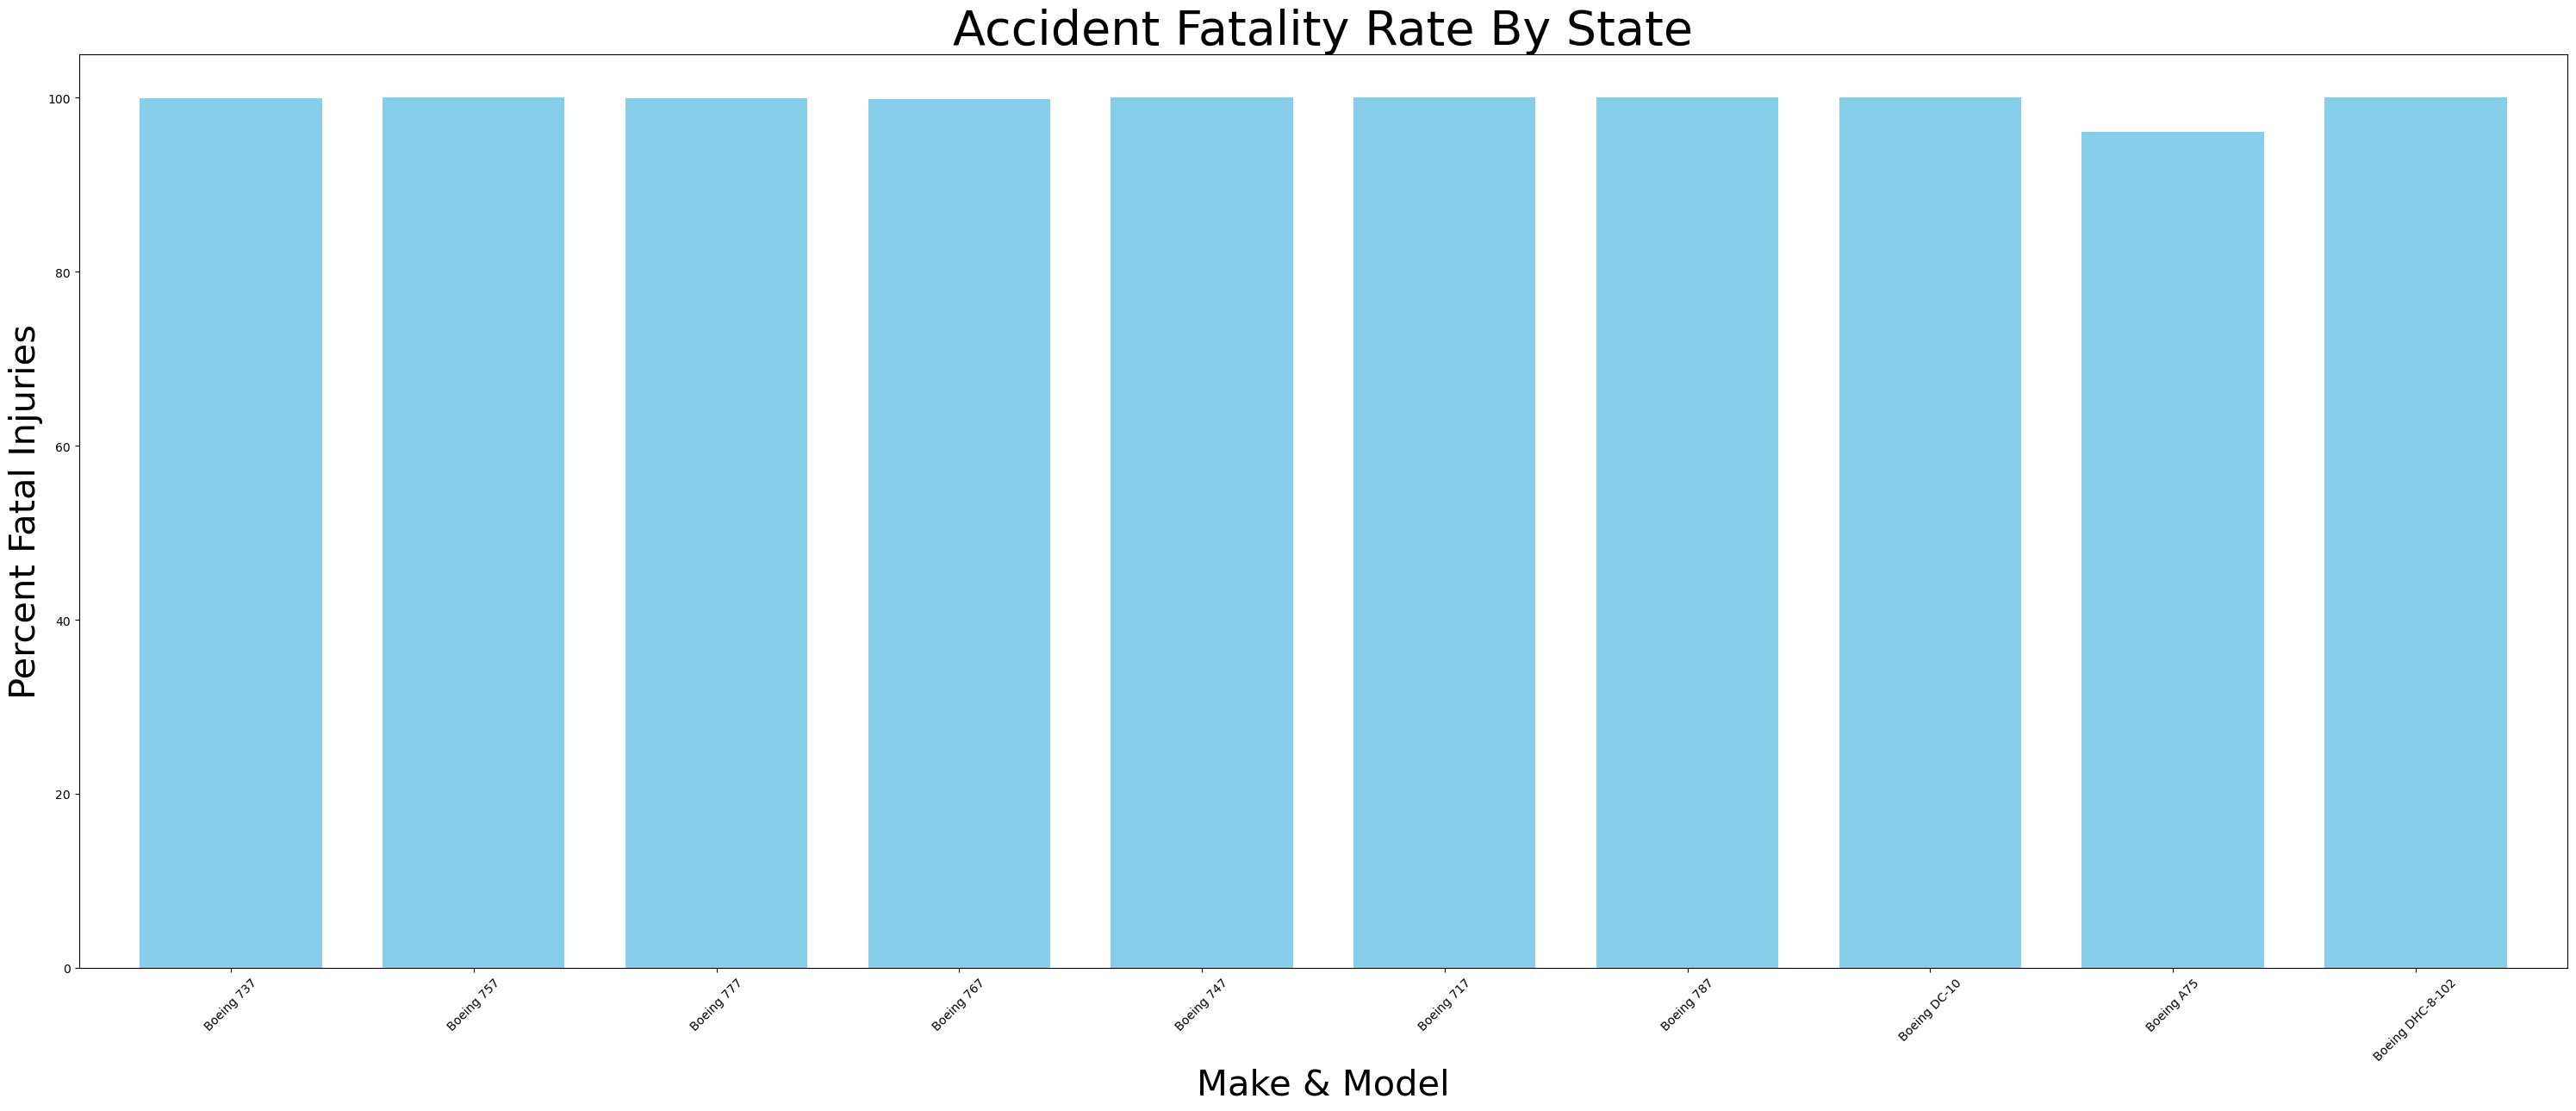

In [625]:

plt.figure(figsize=(30,13))
boeing_families_df['Percent Survivors'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Make & Model', fontsize=30)
plt.ylabel('Percent Fatal Injuries', fontsize=30)
plt.title('Accident Fatality Rate By State', fontsize=40)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

## Additional Airbus Analysis

In [626]:
airbus_df = df[df['Make'] == 'Airbus'].copy()
airbus_df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
65538,20081027X75039,Accident,DCA09FA004,2008-10-20,"Phoenix, Az",United States,PHX,Sky Harbor International,Non-Fatal,Substantial,...,The failure of the flightcrew to arrest an exc...,25-09-2020,10,2008,Airbus 320,162.0,162.0,Phoenix,AZ,1
65850,20090115X73226,Accident,DCA09MA026,2009-01-15,"Weehawken, Nj",United States,LGA,New York La Guardia,Non-Fatal,Substantial,...,"The ingestion of large birds into each engine,...",30-04-2021,1,2009,Airbus A320,155.0,155.0,Weehawken,NJ,1
66309,20090505X04553,Accident,DCA09FA047,2009-05-04,"Denver, Co",United States,KDEN,Denver International,Non-Fatal,Substantial,...,The first officers excessive pitch-up of the ...,25-09-2020,5,2009,Airbus A320,154.0,154.0,Denver,CO,1
66731,20090712X94532,Accident,ERA09LA396,2009-07-10,"Fort Myers, Fl",United States,RSW,Southwest Florida Internationa,Non-Fatal,NaN,...,An inadvertent in-flight encounter with turbul...,25-09-2020,7,2009,Airbus A320-232,153.0,153.0,Fort Myers,FL,1
69561,20110219X32035,Accident,ERA11CA152,2011-02-19,"North Fayston, Vt",United States,BTV,Burlington International,Non-Fatal,NaN,...,The airplane's inadvertent encounter with turb...,25-09-2020,2,2011,Airbus A320-232,119.0,119.0,North Fayston,VT,1


In [627]:
airbus_df_model = airbus_df.groupby(by='Make & Model').sum(numeric_only=True)
airbus_df_model = airbus_df_model[airbus_df_model['Total Passengers'] >= 30].copy()
airbus_df_model.sort_values(by='Count', ascending=False)

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count
Make & Model,,,,,,,,,,
Airbus A320,14.0,0.0,4.0,10.0,869.0,38,16134,883.0,883.0,8
Airbus A321,12.0,0.0,0.0,2.0,1073.0,37,12100,1075.0,1075.0,6
Airbus A319,8.0,0.0,2.0,4.0,385.0,31,8066,391.0,391.0,4
Airbus A321 231,8.0,0.0,1.0,2.0,699.0,34,8067,702.0,702.0,4
Airbus A320-232,6.0,0.0,3.0,3.0,374.0,10,6042,380.0,380.0,3
Airbus A330 323,6.0,0.0,2.0,2.0,847.0,9,6050,851.0,851.0,3
Airbus A330,6.0,0.0,0.0,0.0,560.0,19,6047,560.0,560.0,3
Airbus 320,4.0,0.0,0.0,1.0,281.0,15,4021,282.0,282.0,2
Airbus A321-271N,4.0,0.0,0.0,0.0,331.0,17,4039,331.0,331.0,2


In [628]:
airbus_df_model['Percent Fatal Injuries'] = (airbus_df_model['Total Fatal Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Serious Injuries'] = (airbus_df_model['Total Serious Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Minor Injuries'] = (airbus_df_model['Total Minor Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Uninjured'] = (airbus_df_model['Total Uninjured'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Survivors'] = (airbus_df_model['Total Survivors'] / airbus_df_model['Total Passengers'])*100
airbus_df_model.sort_values(by='Total Passengers', ascending=False, inplace=True)



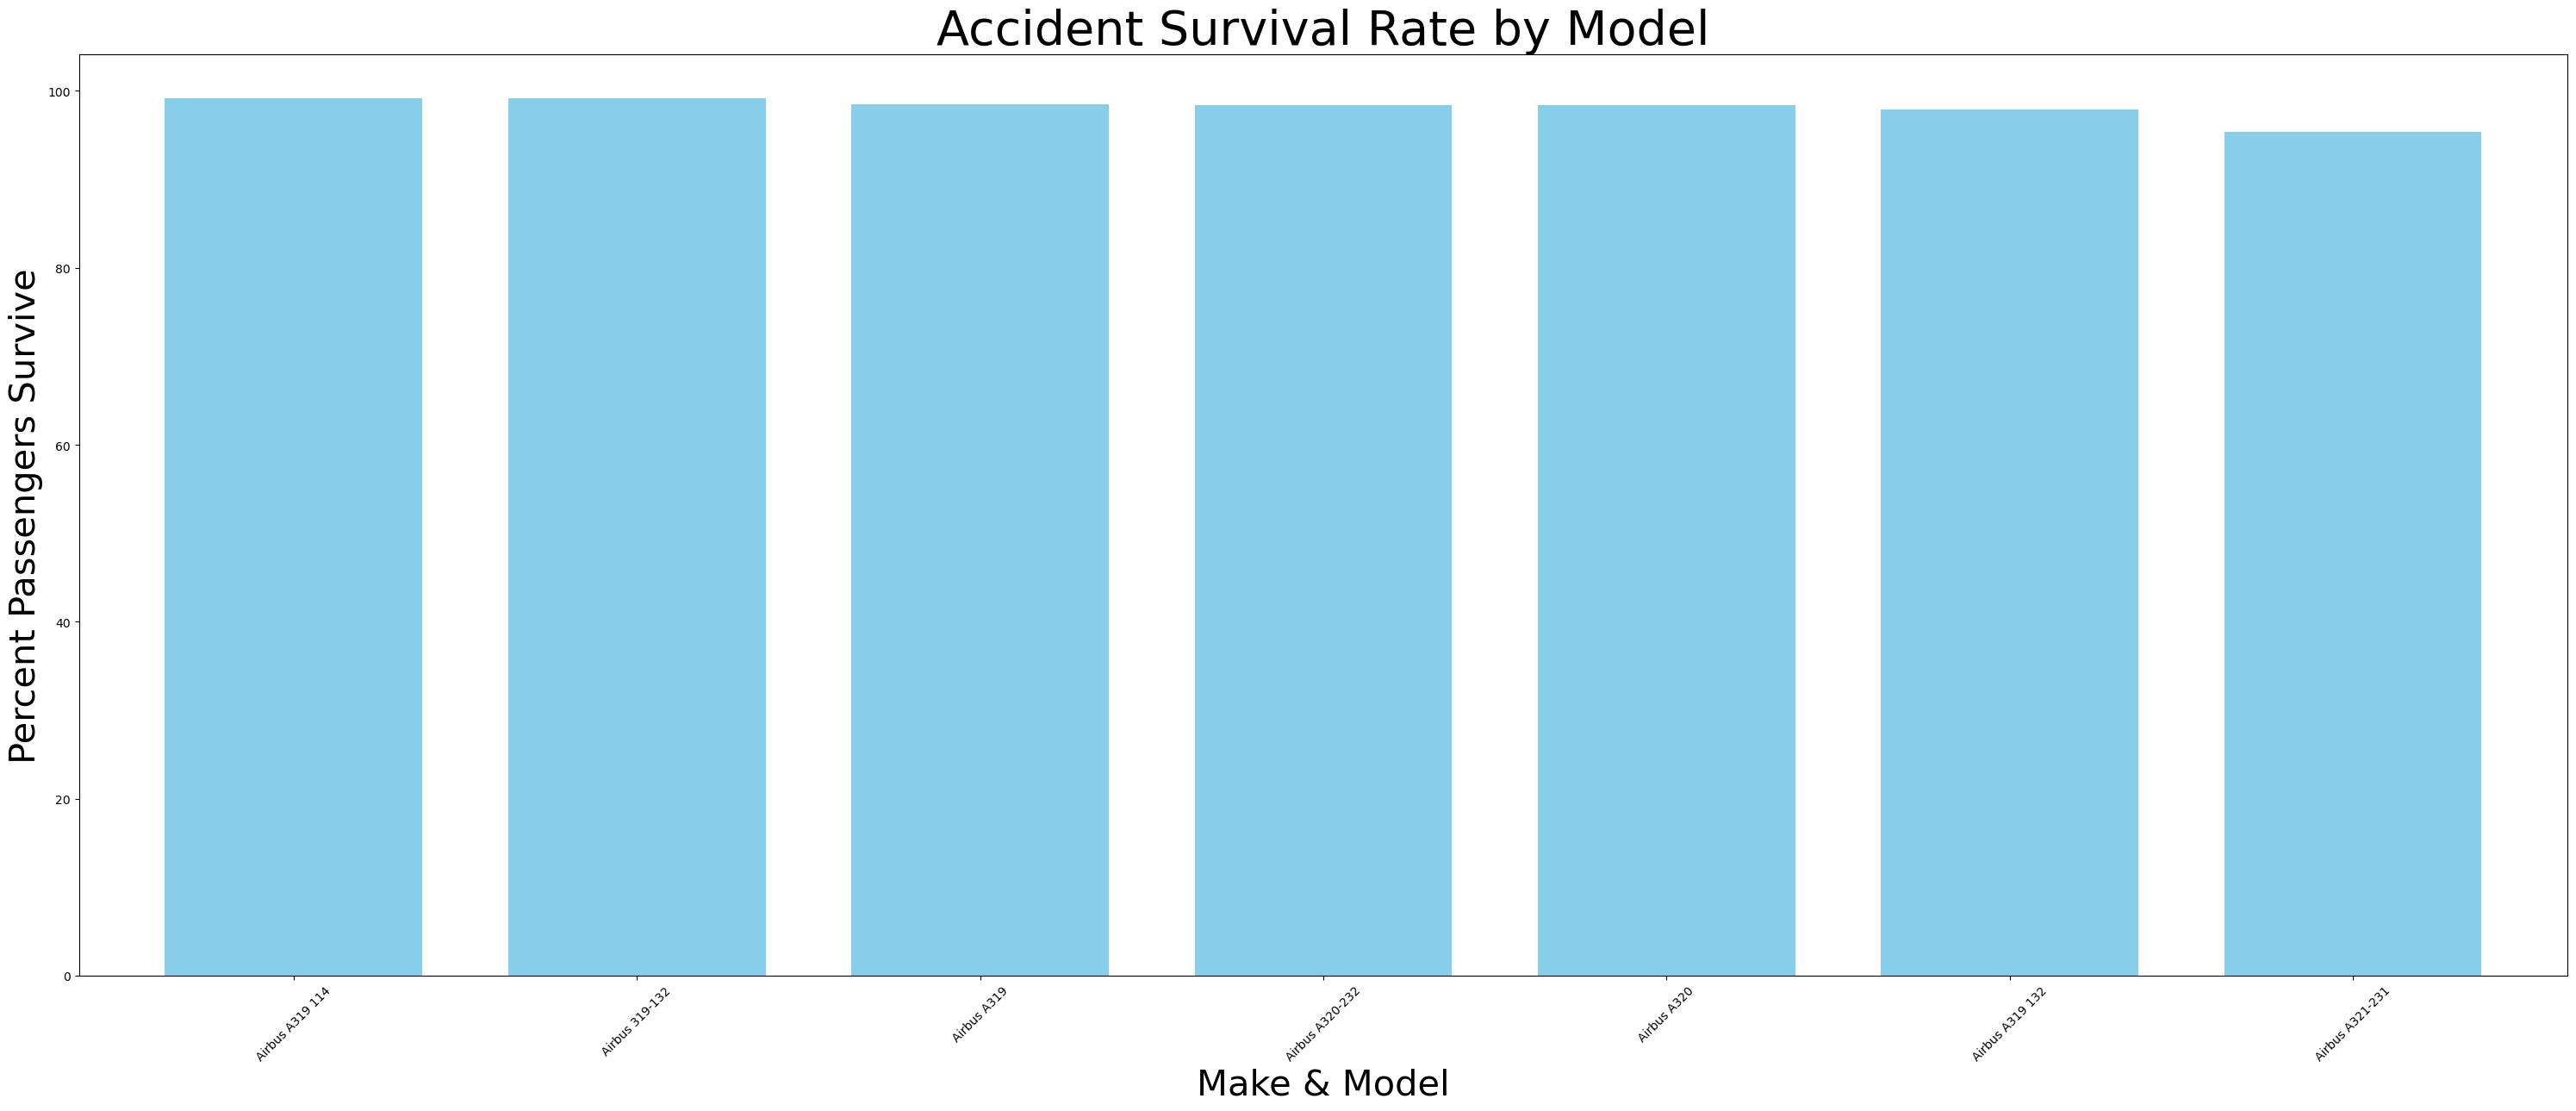

In [629]:
airbus_df_model.sort_values(by='Percent Uninjured', ascending=False, inplace=True)
least_good = airbus_df_model['Percent Uninjured'].tail(7) 
plt.figure(figsize=(30,13))
least_good.plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Make & Model', fontsize=30)
plt.ylabel('Percent Passengers Survive', fontsize=30)
plt.title('Accident Survival Rate by Model', fontsize=40)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

In [630]:
airbus_df_model.reset_index(inplace=True)
airbus_df_model['Consolidated'] = [str(x[:11]) for x in airbus_df_model['Make & Model']]
airbus_df_model

,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated
0,Airbus A321-271N,4.0,0.0,0.0,0.0,331.0,17,4039,331.0,331.0,2,0.0,0.000000,0.000000,100.000000,100.0,Airbus A321
1,Airbus A320 - 214,2.0,0.0,0.0,0.0,154.0,3,2014,154.0,154.0,1,0.0,0.000000,0.000000,100.000000,100.0,Airbus A320
2,Airbus 321,2.0,0.0,0.0,0.0,192.0,4,2013,192.0,192.0,1,0.0,0.000000,0.000000,100.000000,100.0,Airbus 321
3,Airbus A330,6.0,0.0,0.0,0.0,560.0,19,6047,560.0,560.0,3,0.0,0.000000,0.000000,100.000000,100.0,Airbus A330
4,Airbus A340 - 300,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1,0.0,0.000000,0.000000,100.000000,100.0,Airbus A340
5,Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2,0.0,0.000000,0.173310,99.826690,100.0,Airbus A380
6,Airbus A321,12.0,0.0,0.0,2.0,1073.0,37,12100,1075.0,1075.0,6,0.0,0.000000,0.186047,99.813953,100.0,Airbus A321
7,Airbus A319 115,4.0,0.0,0.0,1.0,299.0,24,4032,300.0,300.0,2,0.0,0.000000,0.333333,99.666667,100.0,Airbus A319
8,Airbus 320,4.0,0.0,0.0,1.0,281.0,15,4021,282.0,282.0,2,0.0,0.000000,0.354610,99.645390,100.0,Airbus 320
9,Airbus A330-323,2.0,0.0,0.0,1.0,275.0,4,2011,276.0,276.0,1,0.0,0.000000,0.362319,99.637681,100.0,Airbus A330


In [631]:
airbus_df_model['Consolidated'].value_counts()

Consolidated
Airbus A321    5
Airbus A319    5
Airbus A320    4
Airbus A330    3
Airbus 321     1
Airbus A340    1
Airbus A380    1
Airbus 320     1
Airbus 319-    1
Name: count, dtype: int64

In [632]:
airbus_df_model['Consolidated'].replace('Airbus 319-', 'Airbus A319', inplace=True)
airbus_df_model['Consolidated'].replace('Airbus 320', 'Airbus A320', inplace=True)
airbus_df_model['Consolidated'].replace('Airbus 321', 'Airbus A321', inplace=True)

In [633]:
airbus_families_df = airbus_df_model.groupby(by='Consolidated').sum(numeric_only=True)
airbus_families_df = airbus_families_df.drop(columns=columns_to_drop)
airbus_families_df

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count
Consolidated,,,,,,,,,,
Airbus A319,18.0,0.0,4.0,9.0,1204.0,76,20165,1217.0,1217.0,10
Airbus A320,28.0,0.0,7.0,15.0,1832.0,71,30228,1854.0,1854.0,15
Airbus A321,30.0,0.0,9.0,6.0,2673.0,105,30261,2688.0,2688.0,15
Airbus A330,14.0,0.0,2.0,3.0,1682.0,32,14108,1687.0,1687.0,7
Airbus A340,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1
Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2


In [634]:
airbus_families_df['Percent Fatal Injuries'] = (airbus_families_df['Total Fatal Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Serious Injuries'] = (airbus_families_df['Total Serious Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Minor Injuries'] = (airbus_families_df['Total Minor Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Uninjured'] = (airbus_families_df['Total Uninjured'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Survivors'] = (airbus_families_df['Total Survivors'] / airbus_families_df['Total Passengers'])*100
airbus_families_df.sort_values(by='Total Passengers', ascending=False, inplace=True)
airbus_families_df


,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
Consolidated,,,,,,,,,,,,,,,
Airbus A321,30.0,0.0,9.0,6.0,2673.0,105,30261,2688.0,2688.0,15,0.0,0.334821,0.223214,99.441964,100.0
Airbus A320,28.0,0.0,7.0,15.0,1832.0,71,30228,1854.0,1854.0,15,0.0,0.377562,0.809061,98.813376,100.0
Airbus A330,14.0,0.0,2.0,3.0,1682.0,32,14108,1687.0,1687.0,7,0.0,0.118554,0.177830,99.703616,100.0
Airbus A319,18.0,0.0,4.0,9.0,1204.0,76,20165,1217.0,1217.0,10,0.0,0.328677,0.739523,98.931800,100.0
Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2,0.0,0.000000,0.173310,99.826690,100.0
Airbus A340,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1,0.0,0.000000,0.000000,100.000000,100.0


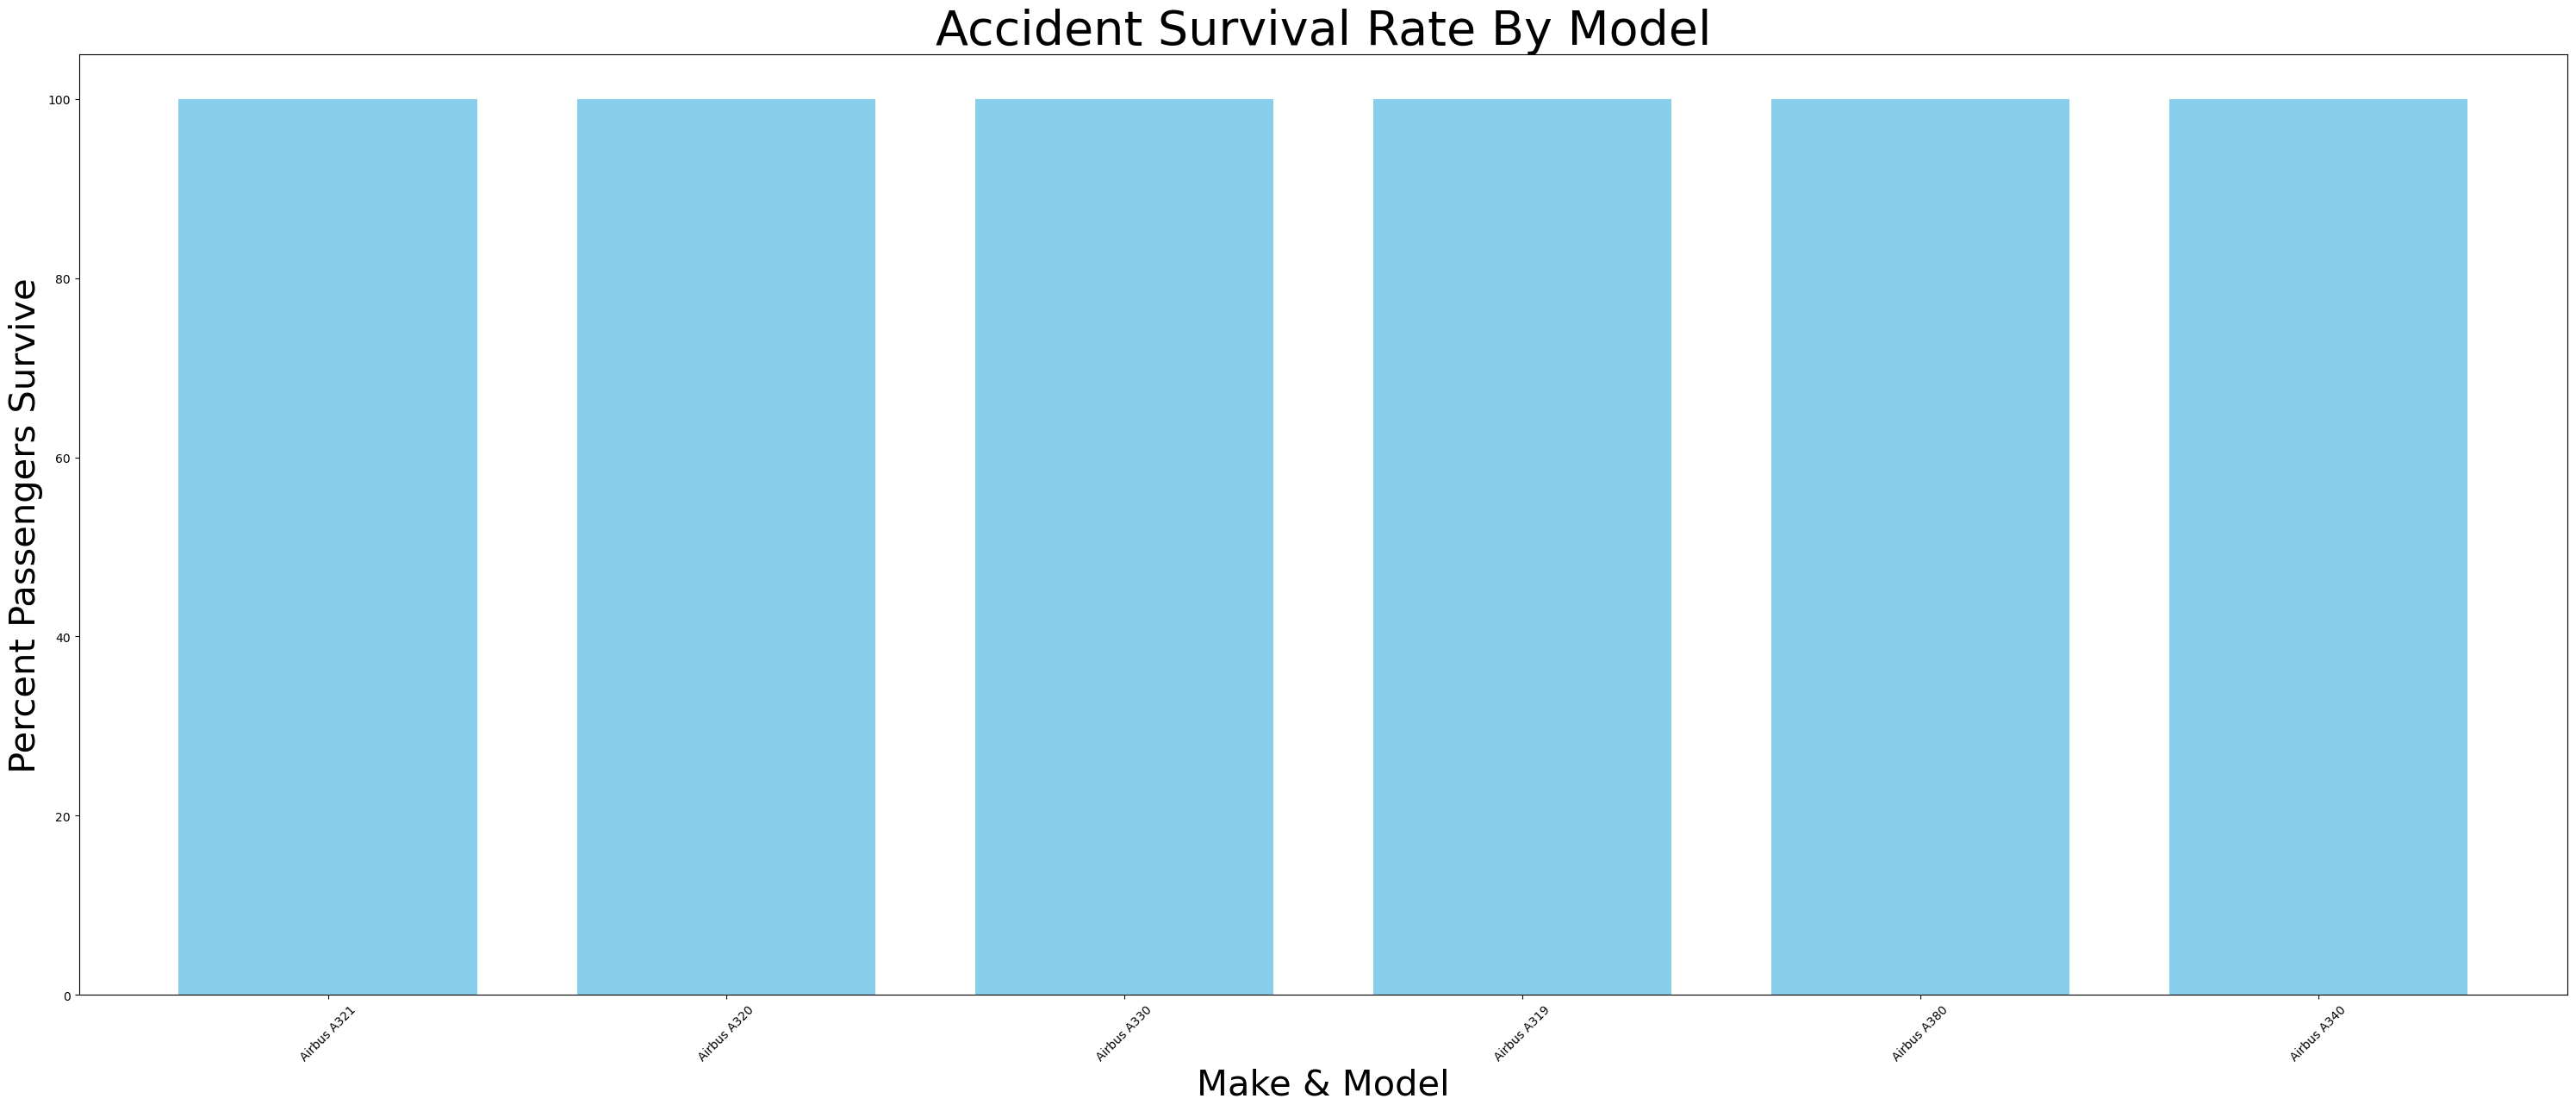

In [635]:
plt.figure(figsize=(30,13))
airbus_families_df['Percent Survivors'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Make & Model', fontsize=30)
plt.ylabel('Percent Passengers Survive', fontsize=30)
plt.title('Accident Survival Rate By Model', fontsize=40)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

## Analyzing Accidents by Month

In [636]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,10-12-2014,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,"Teterboro, Nj",United States,KTEB,Teterboro NJ,Non-Fatal,Substantial,...,Probable Cause,04-02-2009,2,2005,Bombardier CL-600-1A11,13.0,13.0,Teterboro,NJ,1
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,Probable Cause,30-12-2008,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1


In [637]:
df_by_month = df.groupby(['Month']).sum(numeric_only = True)
df_by_month.sort_values(by = 'Count', ascending = False).head()
df_by_month.reset_index(inplace=True)

df_by_month_severity = df.groupby(['Month', 'Injury Severity']).sum(numeric_only = True)

In [638]:
df_by_month_severity

Number Of Engines  Total Fatal Injuries  \
Month Injury Severity                                            
1     Fatal                        203.0                 284.0   
      Minor                          8.0                   0.0   
      Non-Fatal                    773.0                   0.0   
      Serious                        6.0                   0.0   
2     Fatal                        214.0                 386.0   
      Minor                          8.0                   0.0   
      Non-Fatal                    886.0                   0.0   
      Serious                        7.0                   0.0   
3     Fatal                        223.0                 343.0   
      Minor                         15.0                   0.0   
      Non-Fatal                   1178.0                   0.0   
      Serious                       10.0                   0.0   
4     Fatal                        249.0                 353.0   
      Minor                         12.0                   0.0   
      Non-Fatal                   1215.0                   0.0   
      Serious                       11.0                   0.0   
5     Fatal                        298.0                 437.0   
      Minor                         15.0                   0.0   
      Non-Fatal                   1495.0                   0.0   
      Serious                       13.0                   0.0   
6     Fatal                        338.0                 539.0   
      Minor                         22.0                   0.0   
      Non-Fatal                   1758.0                   0.0   
      Serious                       15.0                   0.0   
7     Fatal                        371.0                 620.0   
      Minor                         20.0                   0.0   
      Non-Fatal                   1857.0                   0.0   
      Serious                       26.0                   0.0   
8     Fatal                        366.0                 580.0   
      Minor                         21.0                   0.0   
      Non-Fatal                   1723.0                   0.0   
      Serious                       11.0                   0.0   
9     Fatal                        297.0                 470.0   
      Minor                         20.0                   0.0   
      Non-Fatal                   1517.0                   0.0   
      Serious                        7.0                   0.0   
10    Fatal                        306.0                 441.0   
      Minor                         11.0                   0.0   
      Non-Fatal                   1168.0                   0.0   
      Serious                        8.0                   0.0   
11    Fatal                        285.0                 431.0   
      Minor                         11.0                   0.0   
      Non-Fatal                    852.0                   0.0   
      Serious                       11.0                   0.0   
12    Fatal                        224.0                 338.0   
      Minor                          5.0                   0.0   
      Non-Fatal                    750.0                   0.0   

                       Total Serious Injuries  Total Minor Injuries  \
Month Injury Severity                                                 
1     Fatal                               5.0                  23.0   
      Minor                              10.0                   0.0   
      Non-Fatal                         183.0                 104.0   
      Serious                             1.0                   7.0   
2     Fatal                              11.0                  22.0   
      Minor                               9.0                   0.0   
      Non-Fatal                         254.0                 141.0   
      Serious                             1.0                   9.0   
3     Fatal                               1.0                  25.0   
      M

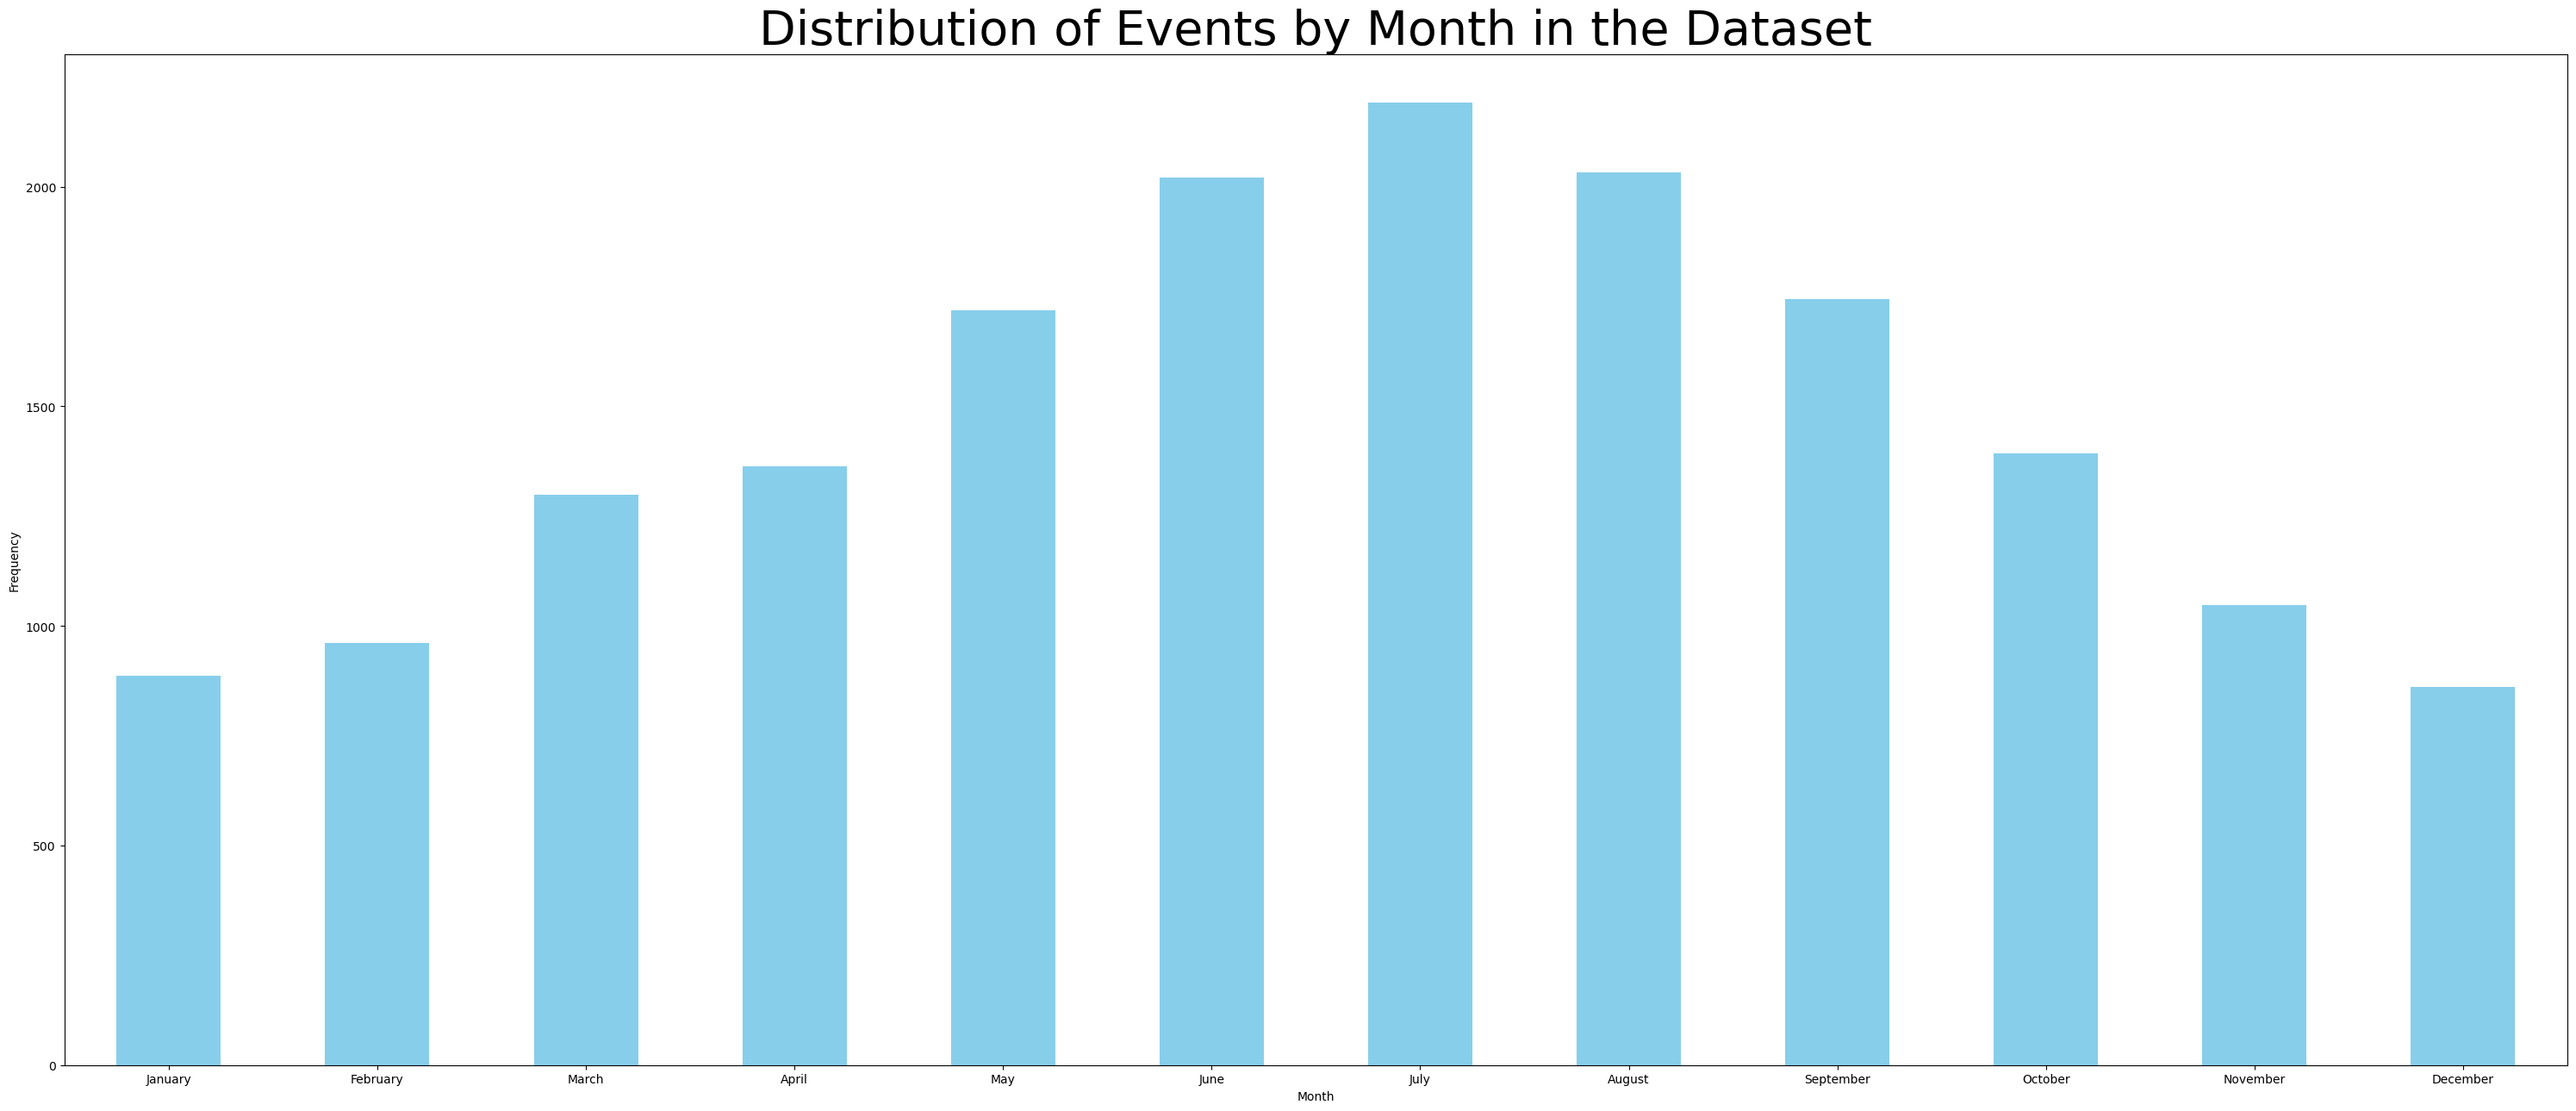

In [639]:
import calendar

plt.figure(figsize=(30, 13))
ax = df_by_month['Count'].plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
month_names = [calendar.month_name[i] for i in df_by_month['Month']]

ax.set_xticklabels(month_names, rotation=0)
plt.title('Distribution of Events by Month in the Dataset', fontsize=40)
plt.tight_layout()
plt.show()

In [640]:
df_by_month['Percent Fatal Injuries'] = (df_by_month['Total Fatal Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Serious Injuries'] = (df_by_month['Total Serious Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Minor Injuries'] = (df_by_month['Total Minor Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Uninjured'] = (df_by_month['Total Uninjured'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Survivors'] = (df_by_month['Total Survivors'] / df_by_month['Total Passengers'])*100
df_by_month.sort_values(by='Month', inplace=True)
df_by_month


,Month,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Total Passengers,Total Survivors,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
0,1,993.0,284.0,199.0,134.0,3180.0,1784918,3797.0,3513.0,886,7.479589,5.240980,3.529102,83.750329,92.520411
1,2,1120.0,386.0,275.0,172.0,4970.0,1938014,5803.0,5417.0,962,6.651732,4.738928,2.963984,85.645356,93.348268
2,3,1429.0,343.0,287.0,206.0,4339.0,2614825,5175.0,4832.0,1298,6.628019,5.545894,3.980676,83.845411,93.371981
3,4,1490.0,353.0,459.0,216.0,4855.0,2745338,5883.0,5530.0,1363,6.000340,7.802142,3.671596,82.525922,93.999660
4,5,1821.0,437.0,471.0,270.0,6740.0,3461007,7918.0,7481.0,1718,5.519070,5.948472,3.409952,85.122506,94.480930
5,6,2146.0,539.0,521.0,344.0,5649.0,4069477,7053.0,6514.0,2020,7.642138,7.386928,4.877357,80.093577,92.357862
6,7,2279.0,620.0,718.0,438.0,5608.0,4416192,7384.0,6764.0,2192,8.396533,9.723727,5.931744,75.947996,91.603467
7,8,2126.0,580.0,591.0,368.0,6453.0,4095002,7992.0,7412.0,2033,7.257257,7.394895,4.604605,80.743243,92.742743
8,9,1843.0,470.0,472.0,320.0,5102.0,3515725,6364.0,5894.0,1745,7.385292,7.416719,5.028284,80.169705,92.614708
9,10,1495.0,441.0,349.0,263.0,4876.0,2806683,5929.0,5488.0,1393,7.438017,5.886321,4.435824,82.239838,92.561983


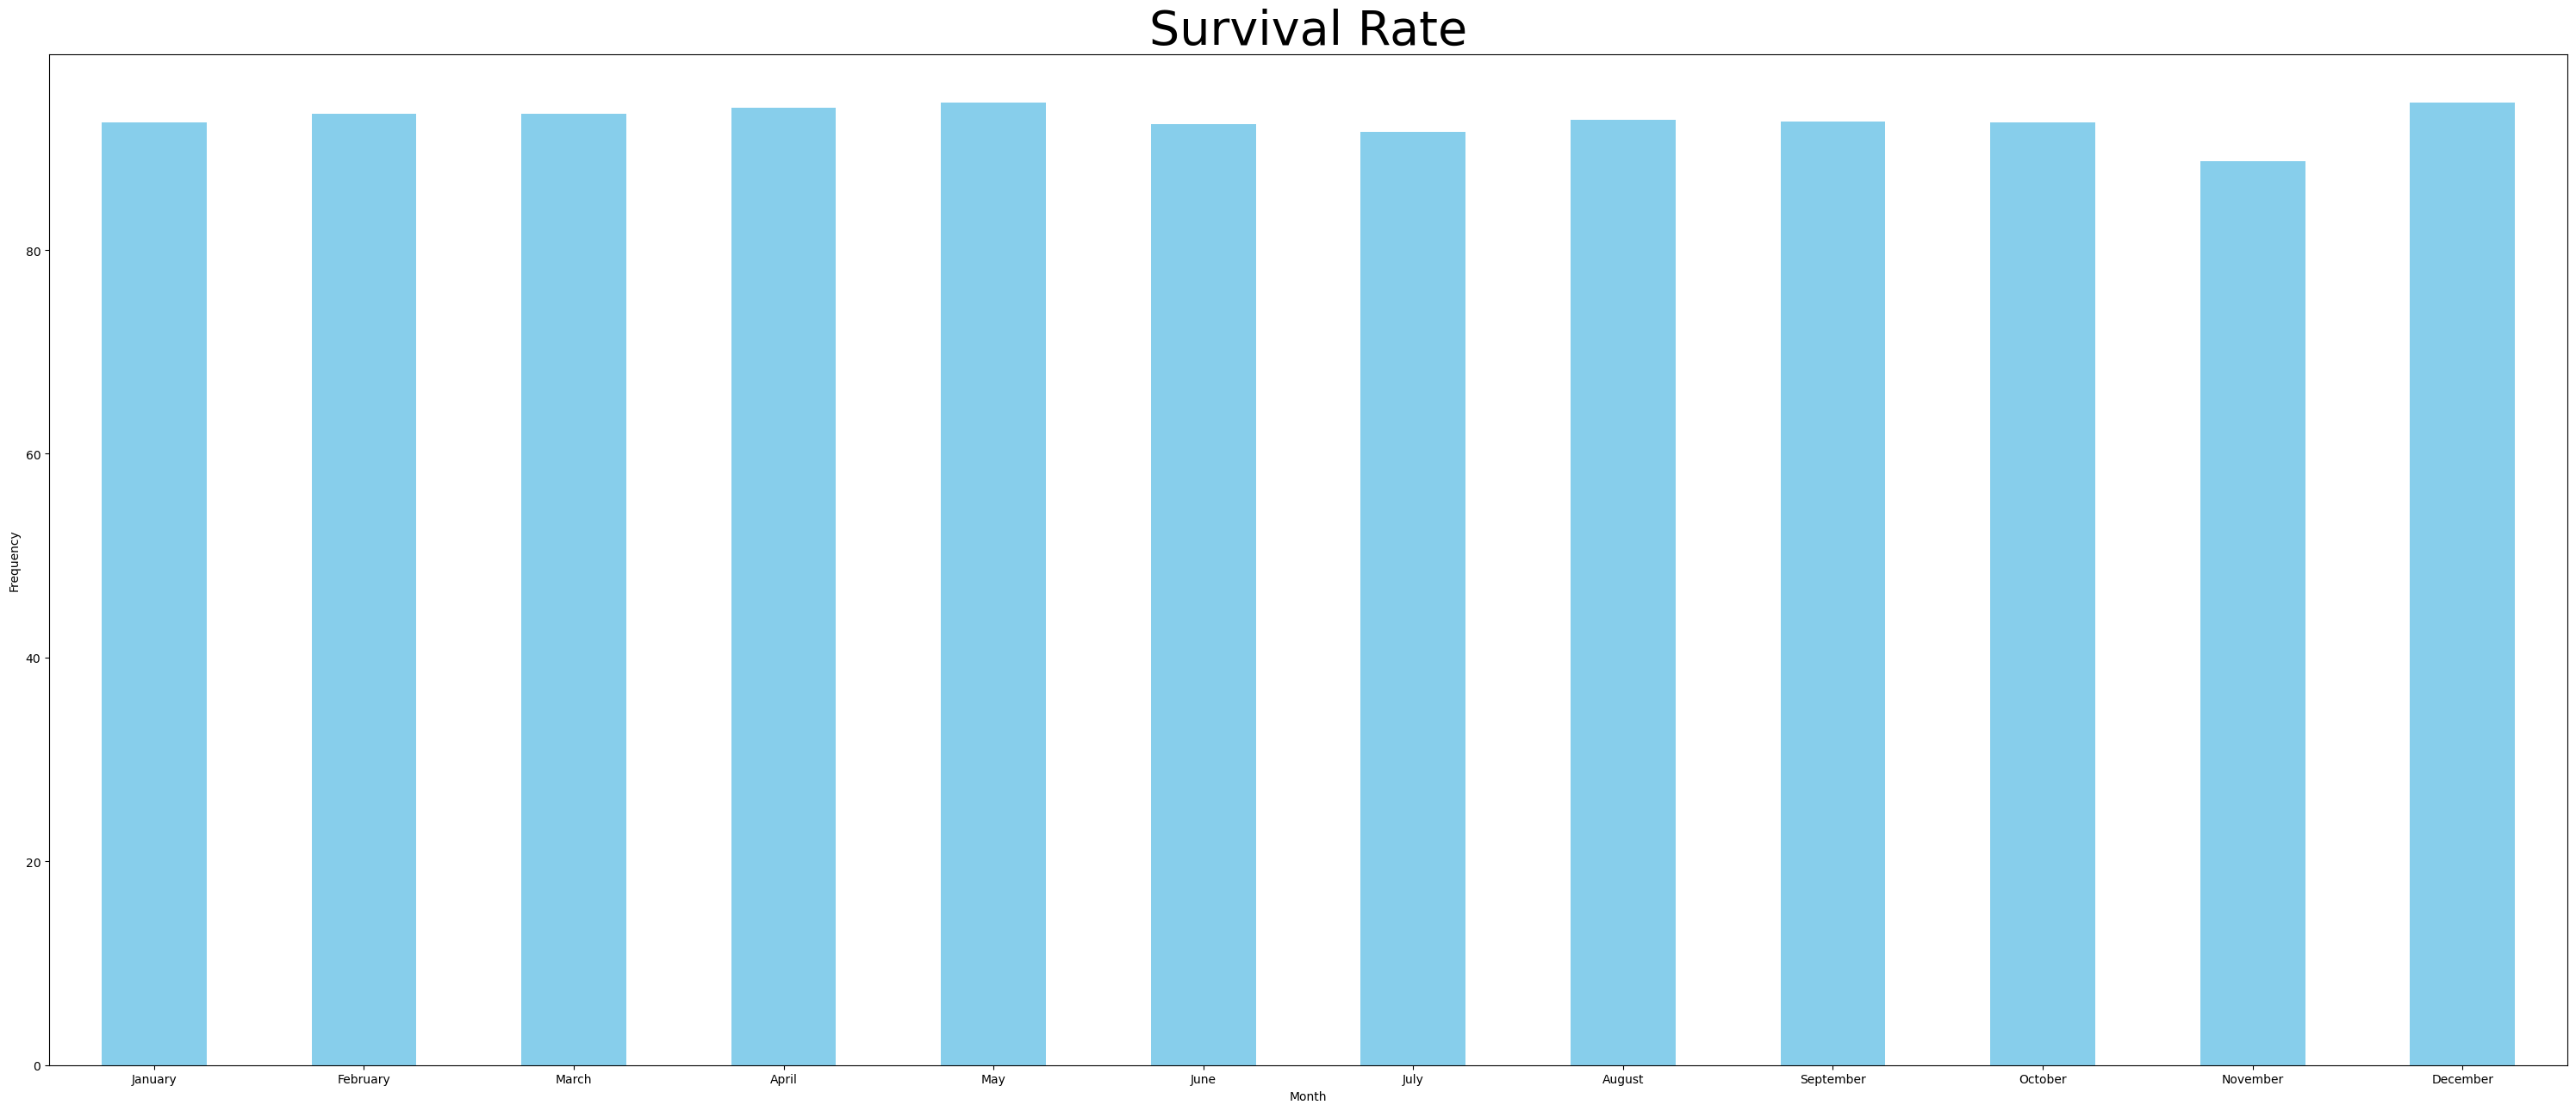

In [641]:
plt.figure(figsize=(30, 13))
ax = df_by_month['Percent Survivors'].plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
month_names = [calendar.month_name[i] for i in df_by_month['Month']]

ax.set_xticklabels(month_names, rotation=0)
plt.title('Survival Rate', fontsize=40)
plt.tight_layout()
plt.show()

In [642]:
bed_conditions_df = df[(df['Aircraft Damage'] == 'Destroyed') & (df['Injury Severity'] == 'Fatal')]
bed_conditions_df

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Report Status,Publication Date,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,10-12-2014,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,28-12-2008,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1
62114,20070510X00546,Accident,DFW07LA160,2007-02-28,"Carlsbad, Nm",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,25-11-2008,2,2007,Ingraham RV-6,1.0,0.0,Carlsbad,NM,1
62139,20070316X00301,Accident,LAX07FA103,2007-03-07,"Tooele, Ut",United States,NaN,NaN,Fatal,Destroyed,...,Probable Cause,29-01-2009,3,2007,Piper PA-28-235,3.0,0.0,Tooele,UT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,20221118106319,Accident,CEN23FA038,2022-11-18,"Decatur, Tx",United States,NaN,NaN,Fatal,Destroyed,...,NaN,14-12-2022,11,2022,Cessna 421C,1.0,0.0,Decatur,TX,1
88812,20221123106352,Accident,WPR23FA044,2022-11-22,"Banning, Ca",United States,BNG,NaN,Fatal,Destroyed,...,NaN,14-12-2022,11,2022,Gallagher XLT-RG,1.0,0.0,Banning,CA,1
88843,20221205106408,Accident,CEN23FA057,2022-12-04,"Cleburne, Tx",United States,CPT,CLEBURNE RGNL,Fatal,Destroyed,...,NaN,15-12-2022,12,2022,Cessna 210-5(205),2.0,0.0,Cleburne,TX,1
88845,20221205106417,Accident,CEN23FA059,2022-12-05,"Corning, Ia",United States,CRZ,Corning Municipal Airport,Fatal,Destroyed,...,NaN,13-12-2022,12,2022,Engineering & Research ERCOUPE 415-C,1.0,0.0,Corning,IA,1


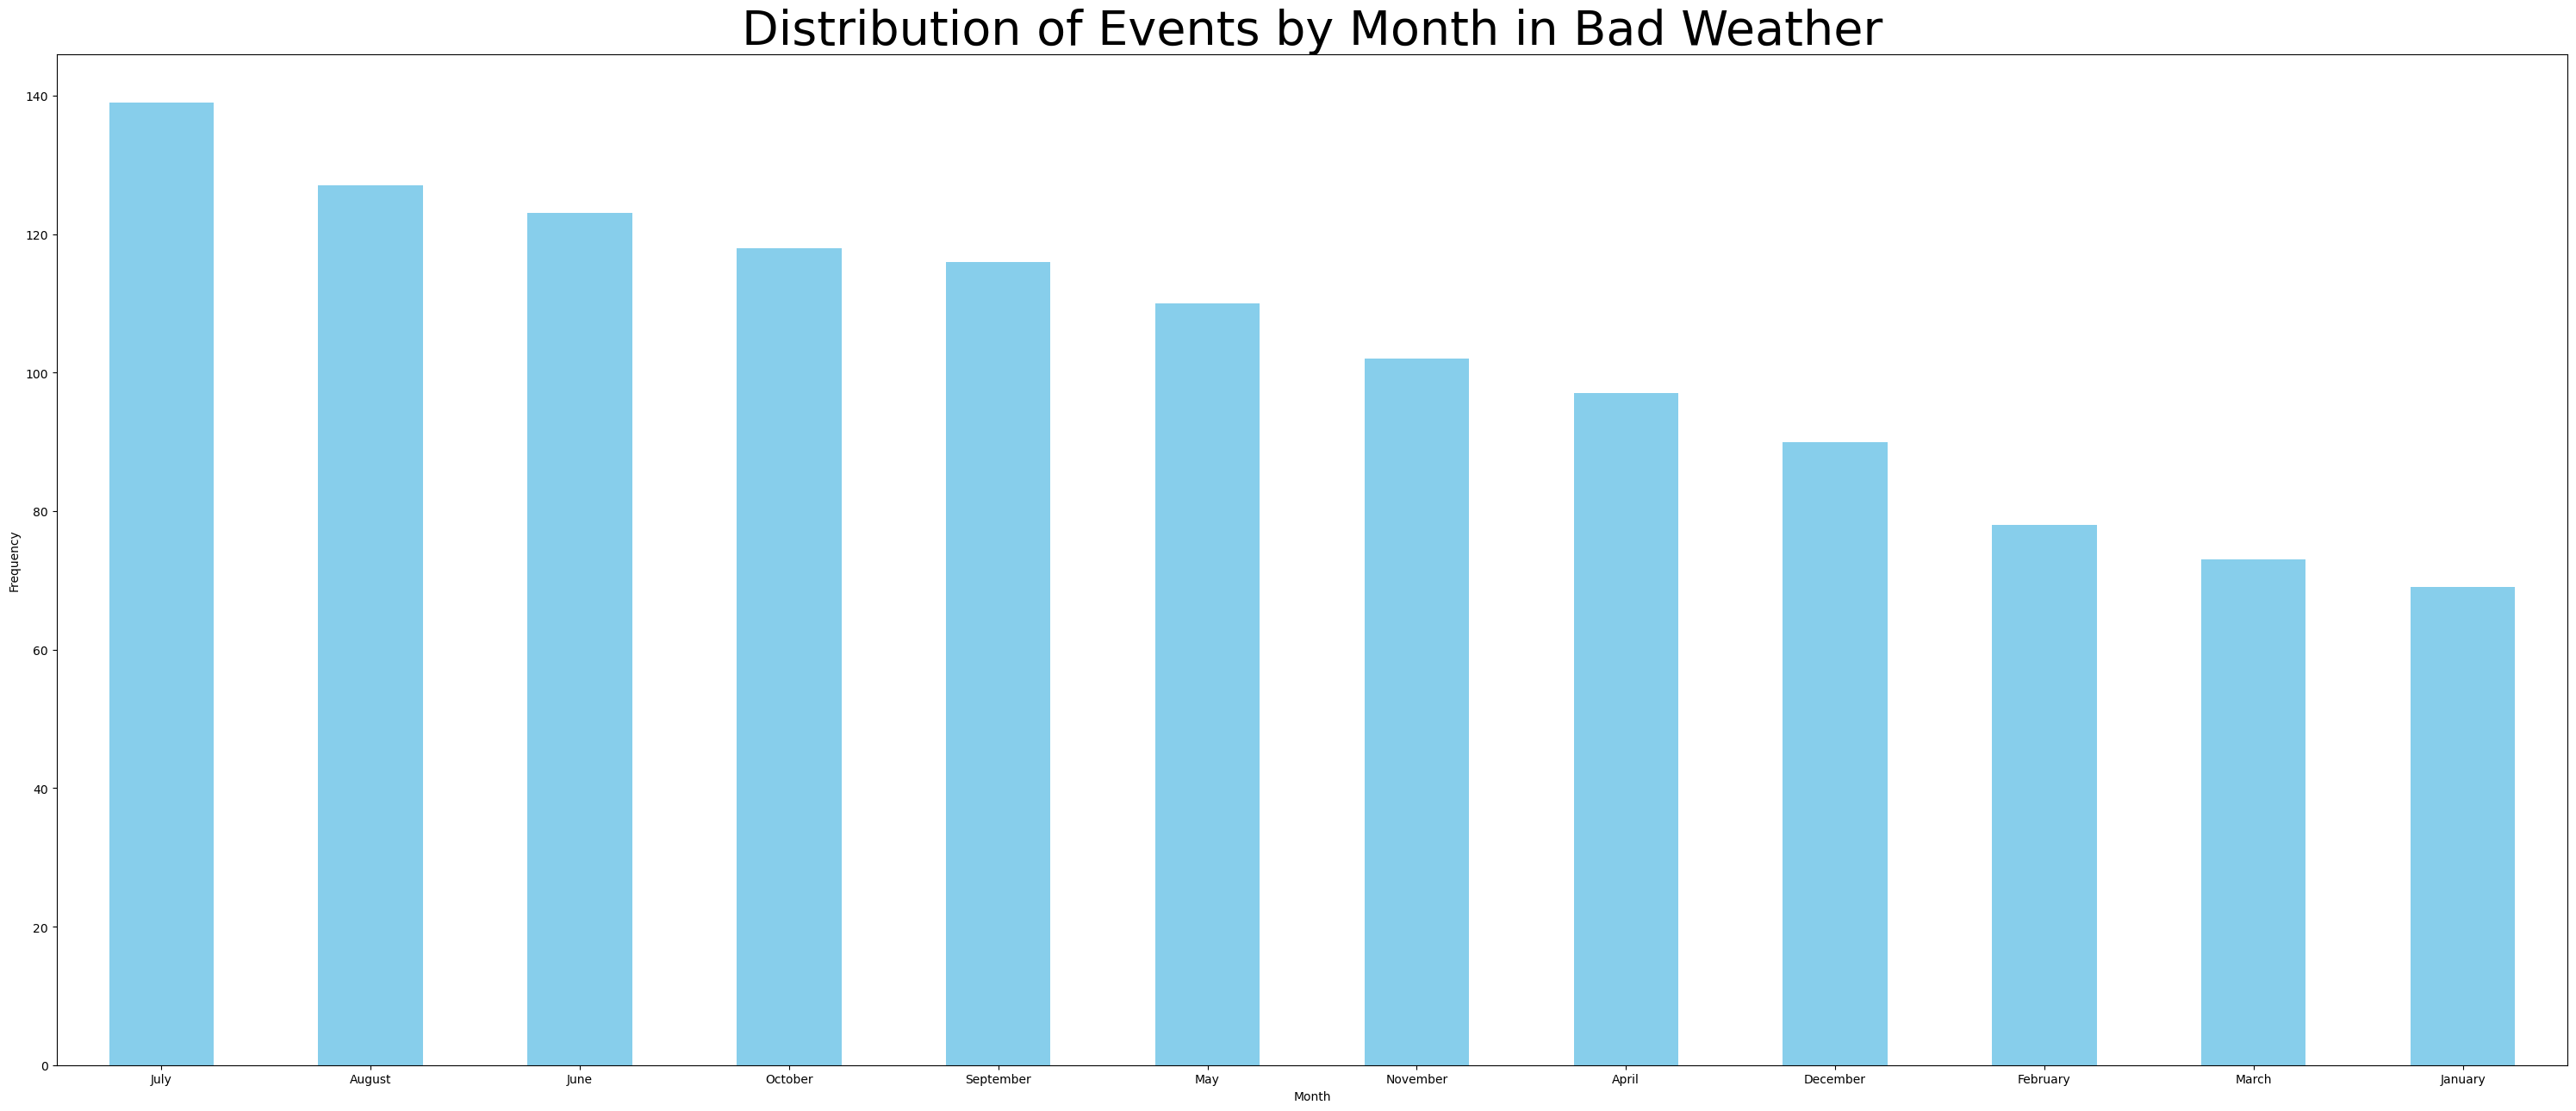

In [643]:
bad_counts = bed_conditions_df['Month'].value_counts()
plt.figure(figsize=(30, 13))
ax = bad_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
month_names = [calendar.month_name[i] for i in bad_counts.index]

ax.set_xticklabels(month_names, rotation=0)
plt.title('Distribution of Events by Month in Bad Weather', fontsize=40)
plt.tight_layout()
plt.show()

In [644]:
df_month_survival = df

In [645]:
df_month_survival['Percent Fatal Injuries'] = (df_month_survival['Total Fatal Injuries'] / df_month_survival['Total Passengers'])*100
df_month_survival['Percent Serious Injuries'] = (df_month_survival['Total Serious Injuries'] / df_month_survival['Total Passengers'])*100
df_month_survival['Percent Minor Injuries'] = (df_month_survival['Total Minor Injuries'] / df_month_survival['Total Passengers'])*100
df_month_survival['Percent Uninjured'] = (df_month_survival['Total Uninjured'] / df_month_survival['Total Passengers'])*100
df_month_survival['Percent Survivors'] = (df_month_survival['Total Survivors'] / df_month_survival['Total Passengers'])*100
df_month_survival.sort_values(by='Total Passengers', ascending=False, inplace=True)
df_month_survival


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Total Passengers,Total Survivors,City,State,Count,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
69813,20110412X23201,Accident,DCA11LA045,2011-04-12,"Jamaica, Ny",United States,JFK,John F Kennedy IAP,Non-Fatal,Substantial,...,576.0,576.0,Jamaica,NY,1,0.0,0.0,0.0,100.0,100.0
68263,20100606X02721,Accident,ERA10LA299,2010-06-05,"Charlotte, Nc",United States,CLT,Charlotte/Douglas Internationa,Non-Fatal,Minor,...,454.0,454.0,Charlotte,NC,1,0.0,0.0,0.0,100.0,100.0
82926,20190311X61805,Accident,DCA19CA105,2019-03-11,"Atlanta, Ga",United States,KATL,Hartsfield-Jackson Atlanta Int,Non-Fatal,Minor,...,406.0,406.0,Atlanta,GA,1,0.0,0.0,0.0,100.0,100.0
73107,20130118X53100,Accident,DCA13LA039,2013-01-17,"Miami, Fl",United States,MIA,Miami Intl,Non-Fatal,Minor,...,397.0,397.0,Miami,FL,1,0.0,0.0,0.0,100.0,100.0
65782,20081228X25156,Accident,WPR09FA068,2008-12-28,"Seattle, Wa",United States,SEA,Seattle-Tacoma Int. Airport,Non-Fatal,Substantial,...,352.0,352.0,Seattle,WA,1,0.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87722,20220425104993,Accident,WPR22LA165,2022-04-25,"Eloy, Az",United States,AZ04,NaN,Non-Fatal,Substantial,...,0.0,0.0,Eloy,AZ,1,NaN,NaN,NaN,NaN,NaN
85014,20200714X42039,Accident,DCA20CA122,2020-07-09,"Chicago, Il",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,Chicago,IL,1,NaN,NaN,NaN,NaN,NaN
83334,20190619X25315,Accident,DCA19CA169,2019-06-09,"Denver, Co",United States,NaN,NaN,NaN,Substantial,...,0.0,0.0,Denver,CO,1,NaN,NaN,NaN,NaN,NaN
73954,20130730X72256,Accident,WPR13CA348,2013-07-26,"Phoenix, Az",United States,IWA,Phoenix-Mesa Gateway Airport,NaN,Substantial,...,0.0,0.0,Phoenix,AZ,1,NaN,NaN,NaN,NaN,NaN
